In [ ]:
# Install packages only in a fresh session
if(!("keras" %in% rownames(installed.packages()))){
    install.packages("keras")
    install.packages("skimr")
    install.packages("ggallin")
    install.packages("viridis")
    install.packages("ggrepel")
    install.packages("ggthemes")
    install.packages("ggridges")
    install.packages("patchwork")
    install.packages("tidyverse")
    install.packages("data.table")
    install.packages("treemapify")
    install.packages("ggcorrplot")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘config’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspec

In [ ]:
library(grid)
library(keras)
library(skimr)
library(scales)
library(ggallin)
library(viridis)
library(ggrepel)
library(ggthemes)
library(ggridges)
library(lubridate)
library(patchwork)
library(tidyverse)
library(data.table)
library(ggcorrplot)
library(treemapify)

# Disable scientific notation of numbers
options(scipen = 999)

# Plot output size
options(repr.plot.width = 15, repr.plot.height = 12)

bitcoin_color <- "#FF9900"

Loading required package: ggplot2

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ readr::col_factor()      masks scales::col_factor()
✖ lubridate::date()        masks base::date()
✖ purrr::discard()         masks scales::discard()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ 

In [ ]:
# Set custom theme as default
theme_crypto <- function() {
  theme_minimal() %+replace%
    theme(axis.text = element_text(size = 15),
          plot.title = element_text(size = 25, margin = margin(10, 0, 15, 0)),
          axis.title = element_text(size = 15),
          strip.text = element_text(size = 15),
          legend.text = element_text(size = 15),
          legend.title = element_text(size = 15),
          legend.key.size = unit(3, "line"))
}

theme_set(theme_crypto())

# Custom plot scales for millions and billions of dollars
m_scale <- function(x){ 
    number_format(accuracy = 1,
                  scale = 1 / 1e6,
                  prefix = "$",
                  suffix = "M",
                  big.mark = ",")(x)
}

bn_scale <- function(x){ 
    number_format(accuracy = 0.1,
                  scale = 1 / 1e9,
                  prefix = "$",
                  suffix = "bn",
                  big.mark = ",")(x)
}

In [ ]:
df <- read_csv("crypto-markets.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  slug = col_character(),
  symbol = col_character(),
  name = col_character(),
  date = col_date(format = ""),
  ranknow = col_double(),
  open = col_double(),
  high = col_double(),
  low = col_double(),
  close = col_double(),
  volume = col_double(),
  market = col_double(),
  close_ratio = col_double(),
  spread = col_double()
)




In [ ]:
skim(df)

data_dates <- df %>% summarise(min_date = min(date), 
                               max_date = max(date))

plot_years <- seq.Date(make_date(year(data_dates$min_date), 1, 1), 
                       make_date(year(data_dates$max_date), 1, 1),
                       "1 year")

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             942297
Number of columns          13    
_______________________          
Column type frequency:           
  character                3     
  Date                     1     
  numeric                  9     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 slug                  0             1     2    36     0     2071          0
2 symbol                0             1     1     9     0     2005          0
3 name                  0             1     2    36     0     2071          0

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 date                  0           

In [ ]:
# Number of rows
nrow(df)
# Number of columns
ncol(df)
# Number of coins
length(unique(df$name))
# Minimum and maximum dates
data_dates
# Column names
head(df)

[1] 942297

[1] 13

[1] 2071

min_date,max_date
<date>,<date>
2013-04-28,2018-11-30


slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1488566728,0.5438,3.88
bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1603768865,0.7813,13.49
bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1542813125,0.3843,12.88
bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1298954594,0.2882,32.17
bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1168517495,0.3881,33.32
bitcoin,BTC,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0,1085995169,0.6424,29.03


In [ ]:
# Ranges of numeric columns
df %>%
    select_if(is.numeric) %>%
    summarise_all(funs(min, 
                       q_25 = quantile(., 0.25),
                       median,
                       q_75 = quantile(., 0.75),
                       max)) %>%
    t() %>%
    as.data.frame() %>%
    rownames_to_column() %>%
    rename(value = V1, column = rowname) %>%
    mutate(value = as.character(value)) %>%
    mutate(stat = case_when(str_detect(column, "max") ~ "max",
                            str_detect(column, "median") ~ "median",
                            str_detect(column, "min") ~ "min",
                            str_detect(column, "q_25") ~ "25th percentile",
                            str_detect(column, "q_75") ~ "75th percentile"),
           column = str_remove_all(column, 
                                   "_max|_median|_min|_q_25|_q_75")) %>%
    pivot_wider(names_from = column, values_from = value)

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


stat,ranknow,open,high,low,close,volume,market,close_ratio,spread
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
min,1,0.0000000025,0.0000000032,0.00000000025,0.0000000002,0,0,-1,0
25th percentile,465,0.002321,0.002628,0.002044,0.002314,175,29581,0.1629,0
median,1072,0.023983,0.026802,0.021437,0.023892,4278,522796,0.4324,0
75th percentile,1484,0.22686,0.250894,0.204391,0.225934,119090,6874647,0.7458,0.03
max,2072,2298390,2926100,2030590,2300740,23840899072,326502485530,1,1770563


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



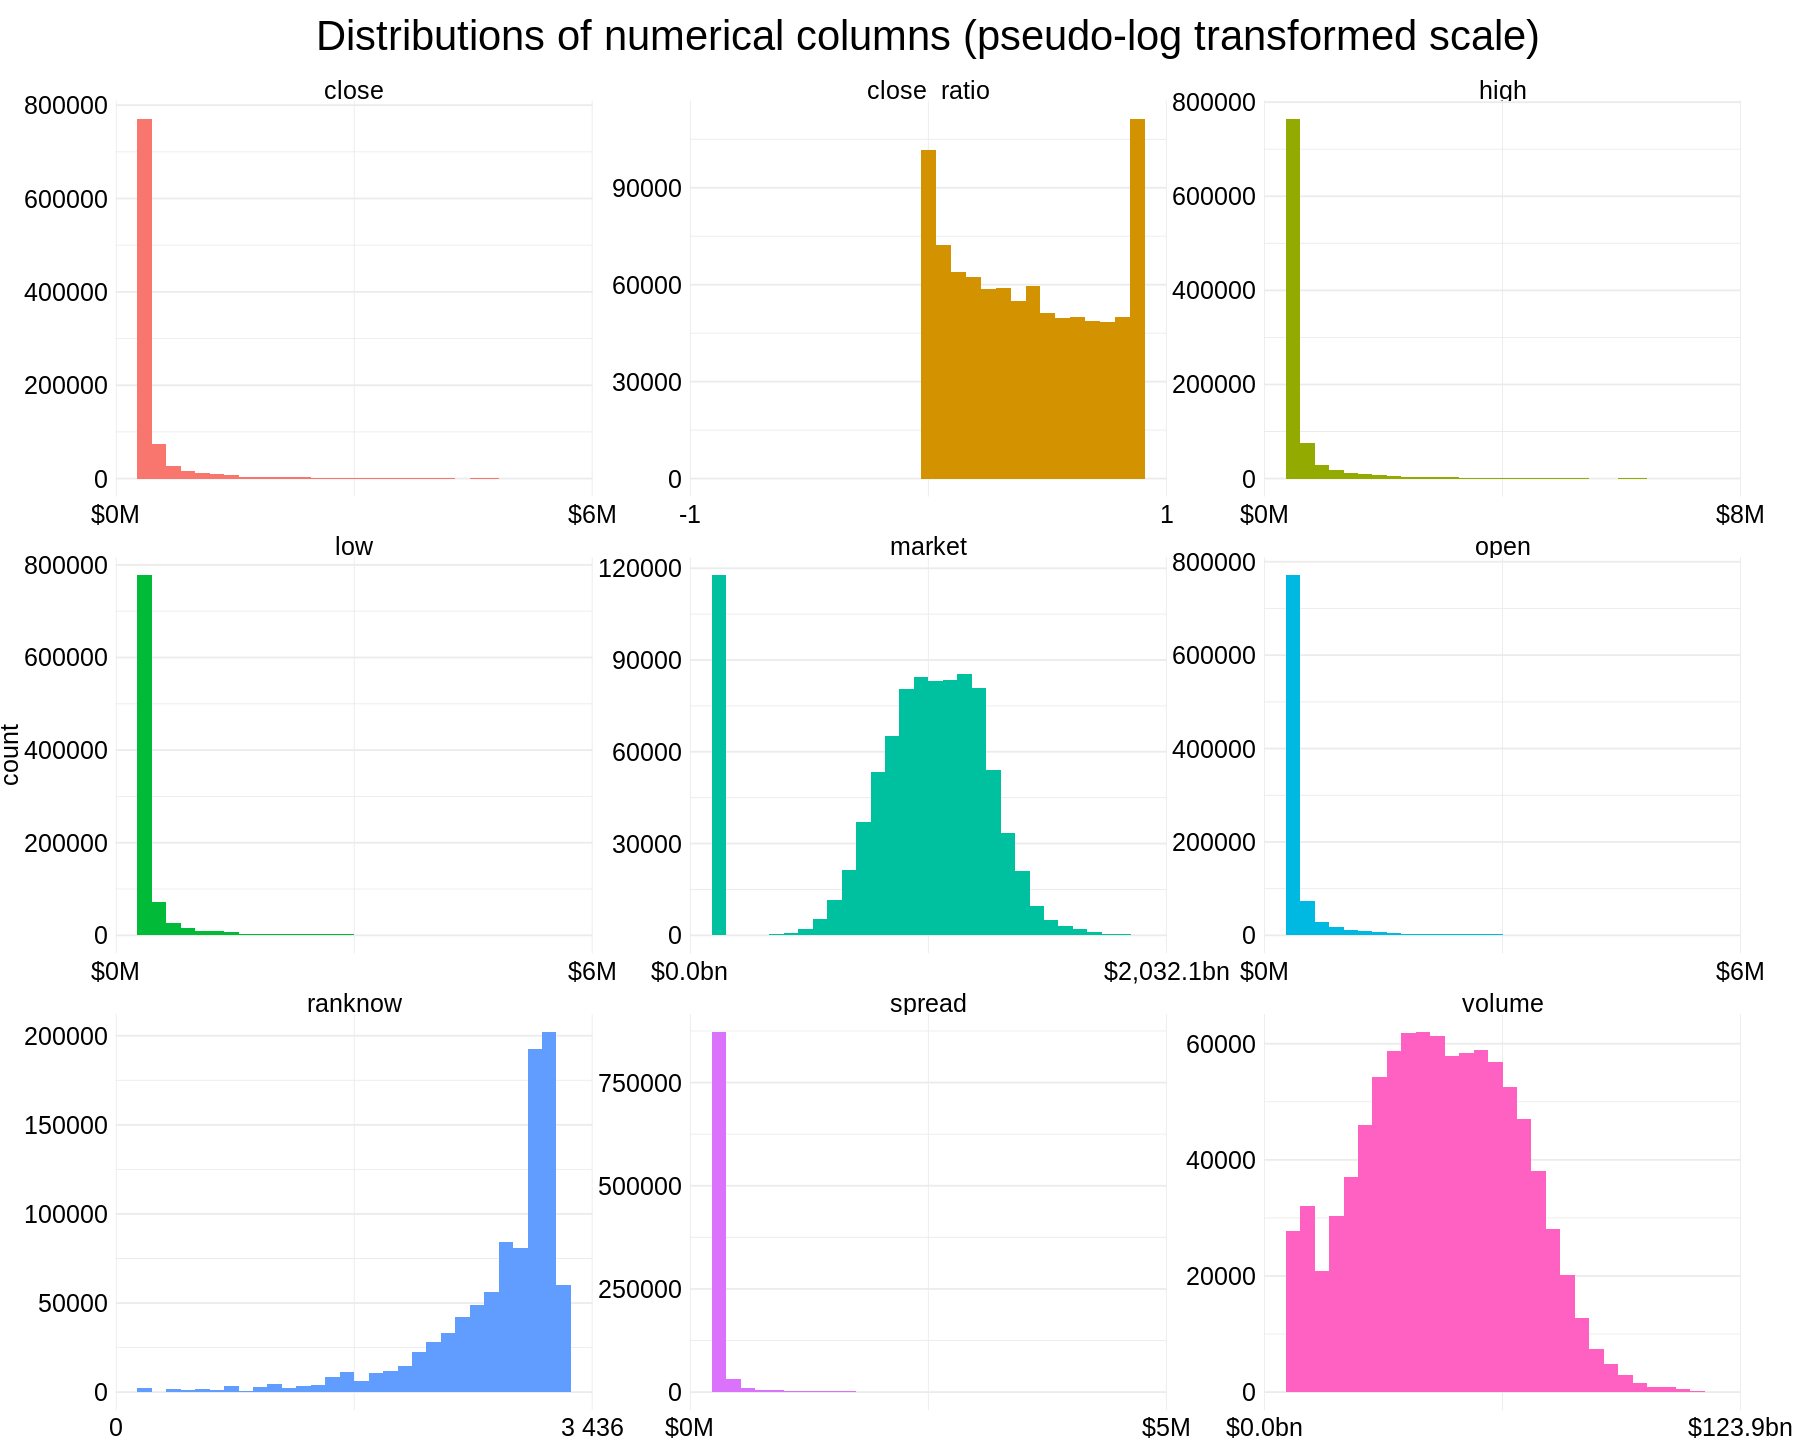

In [ ]:
equal_breaks <- function(x) {
  c(min(x), max(x))
}

equal_breaks_labels <- function(x) {
  if(max(x) > 1e9) {
    bn_scale(equal_breaks(x))
  } else {
    if(max(x) > 1e6) {
      m_scale(equal_breaks(x))
    } else {
      number_format(1)(equal_breaks(x))
    }
  }
}

df %>%
  select_if(is.numeric) %>%
  pivot_longer(ranknow:spread) %>%
  ggplot(aes(value, fill = name)) +
  geom_histogram() +
  #coord_flip() +
  ggtitle("Distributions of numerical columns (pseudo-log transformed scale)") +
  xlab(NULL) +
  scale_x_continuous(trans = pseudolog10_trans,
                     breaks = equal_breaks,
                     labels = equal_breaks_labels) +
  facet_wrap( ~ name, scales = "free") +
  theme(legend.position = "none",
        plot.margin = unit(c(0, 1.25, 0, 0), "cm"))

In [ ]:
summary(df)

     slug              symbol              name                date           
 Length:942297      Length:942297      Length:942297      Min.   :2013-04-28  
 Class :character   Class :character   Class :character   1st Qu.:2016-12-17  
 Mode  :character   Mode  :character   Mode  :character   Median :2018-01-18  
                                                          Mean   :2017-08-10  
                                                          3rd Qu.:2018-07-24  
                                                          Max.   :2018-11-30  
    ranknow          open                high                low           
 Min.   :   1   Min.   :      0.0   Min.   :      0.0   Min.   :      0.0  
 1st Qu.: 465   1st Qu.:      0.0   1st Qu.:      0.0   1st Qu.:      0.0  
 Median :1072   Median :      0.0   Median :      0.0   Median :      0.0  
 Mean   :1000   Mean   :    348.4   Mean   :    408.6   Mean   :    296.3  
 3rd Qu.:1484   3rd Qu.:      0.2   3rd Qu.:      0.3   3rd Qu.:   

In [ ]:
# Zeros in columns
df %>%
  summarise_at(vars(open, high, low, close, volume, market, spread),
                function(x) sum(x == 0))

open,high,low,close,volume,market,spread
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,27820,117697,502888


In [ ]:
# Data points for each currency
df %>% 
    group_by(name) %>%
    summarise(n = n()) %>%
    pull(n) %>%
    summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2     121     314     455     535    2042 

In [ ]:
# Check for coins with same names
df %>% 
    group_by(name, date) %>%
    summarise(n = n()) %>%
    pull(n) %>%
    summary()

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.

Picking joint bandwidth of 0.108



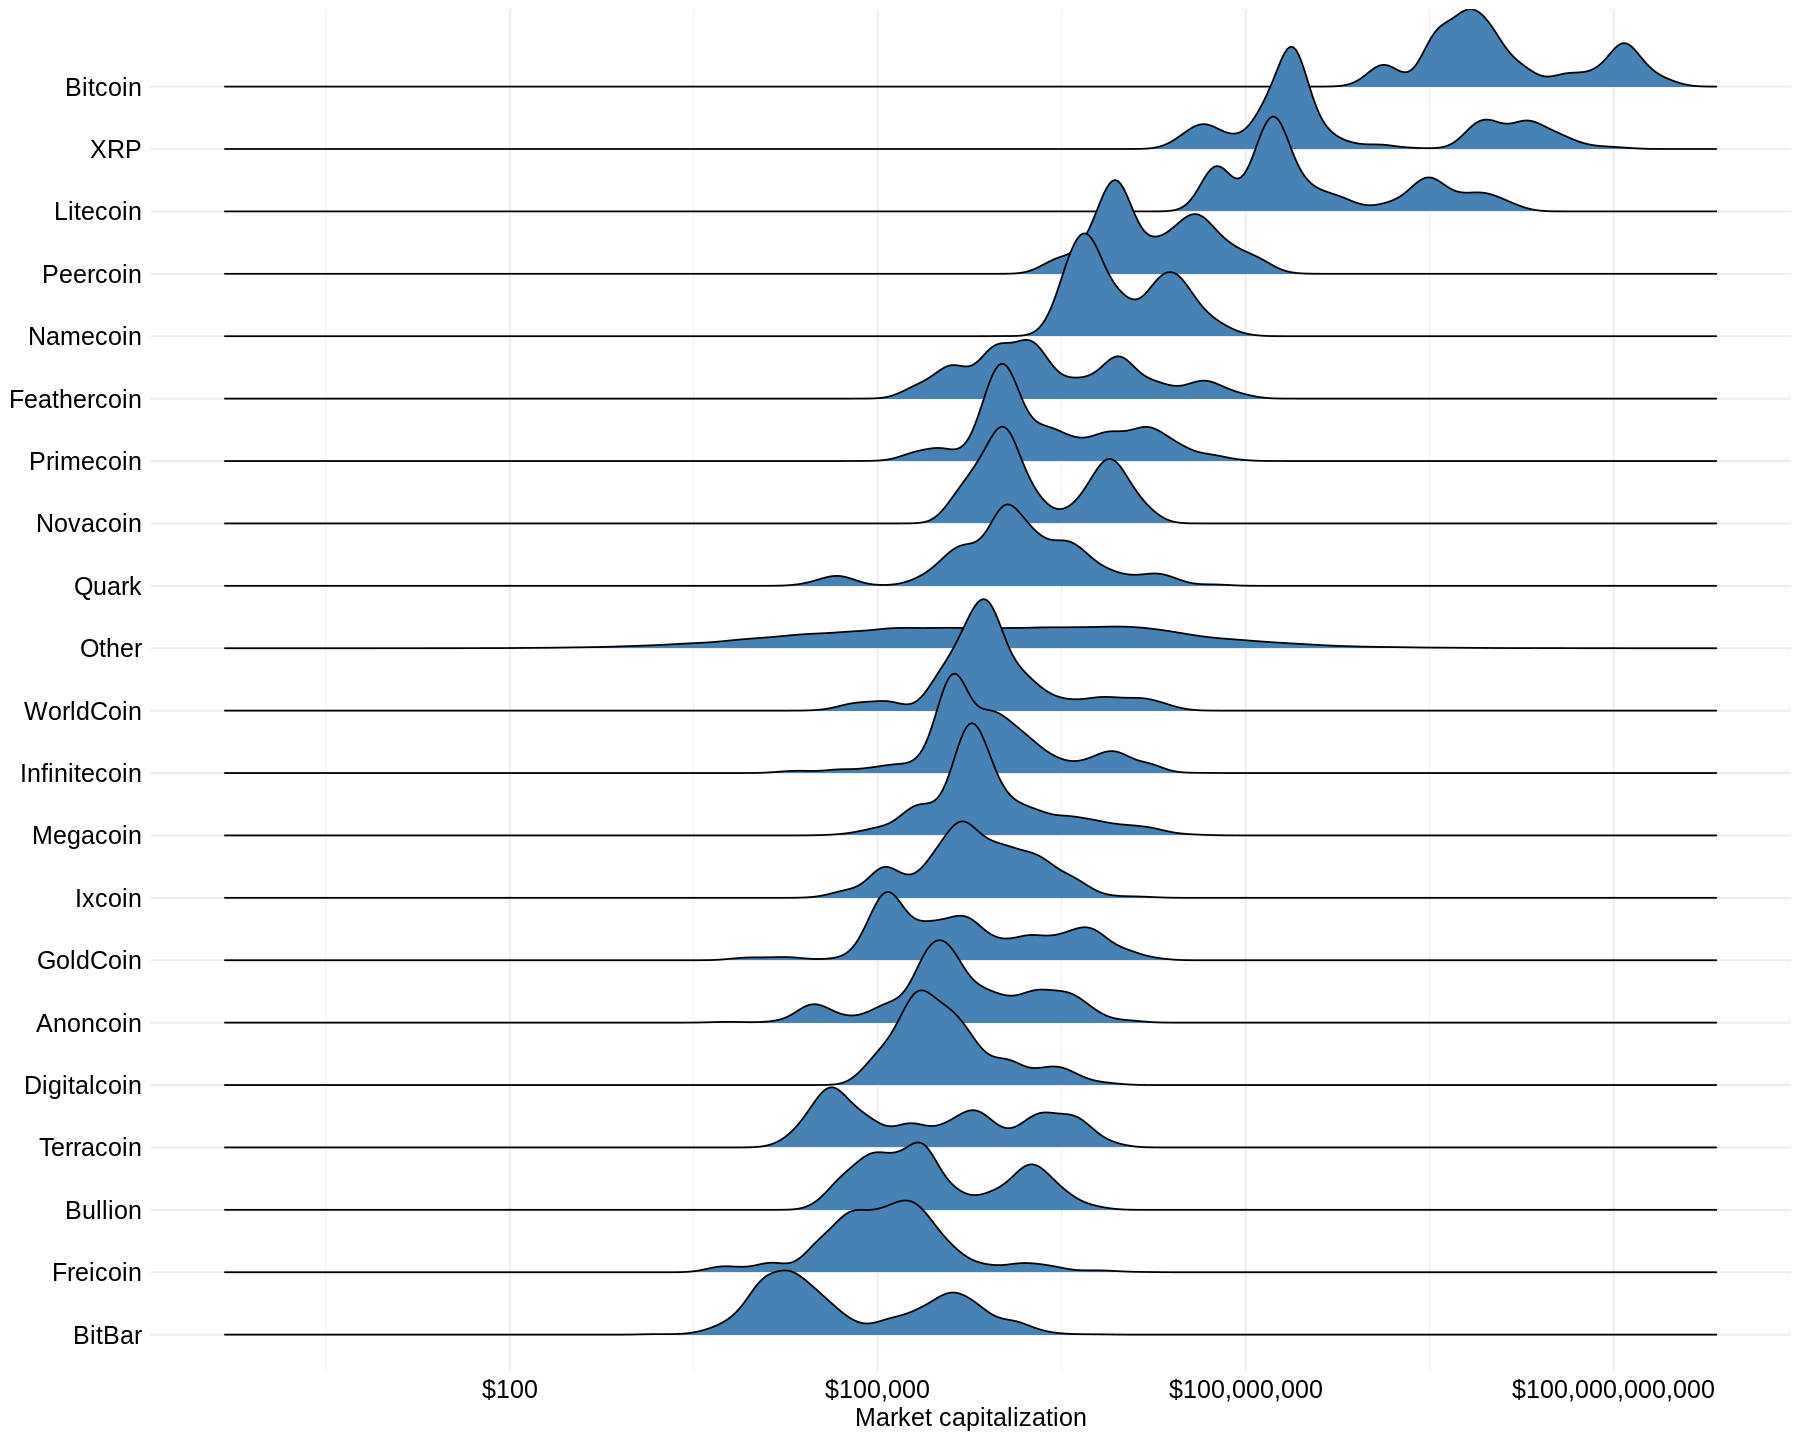

In [ ]:
df %>%
  mutate(name = fct_lump(name, 20)) %>%
  group_by(name) %>%
  summarise(market = market) %>%
  filter(!is.na(market),
         market > 0) %>%
  ggplot(aes(x = market, y = fct_reorder(name, market))) +
  geom_density_ridges(fill = "steelblue") +
  ylab(NULL) +
  xlab("Market capitalization") +
  scale_x_log10(labels = scales::dollar) +
  theme_crypto()
  #ggthemes::theme_tufte()

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.



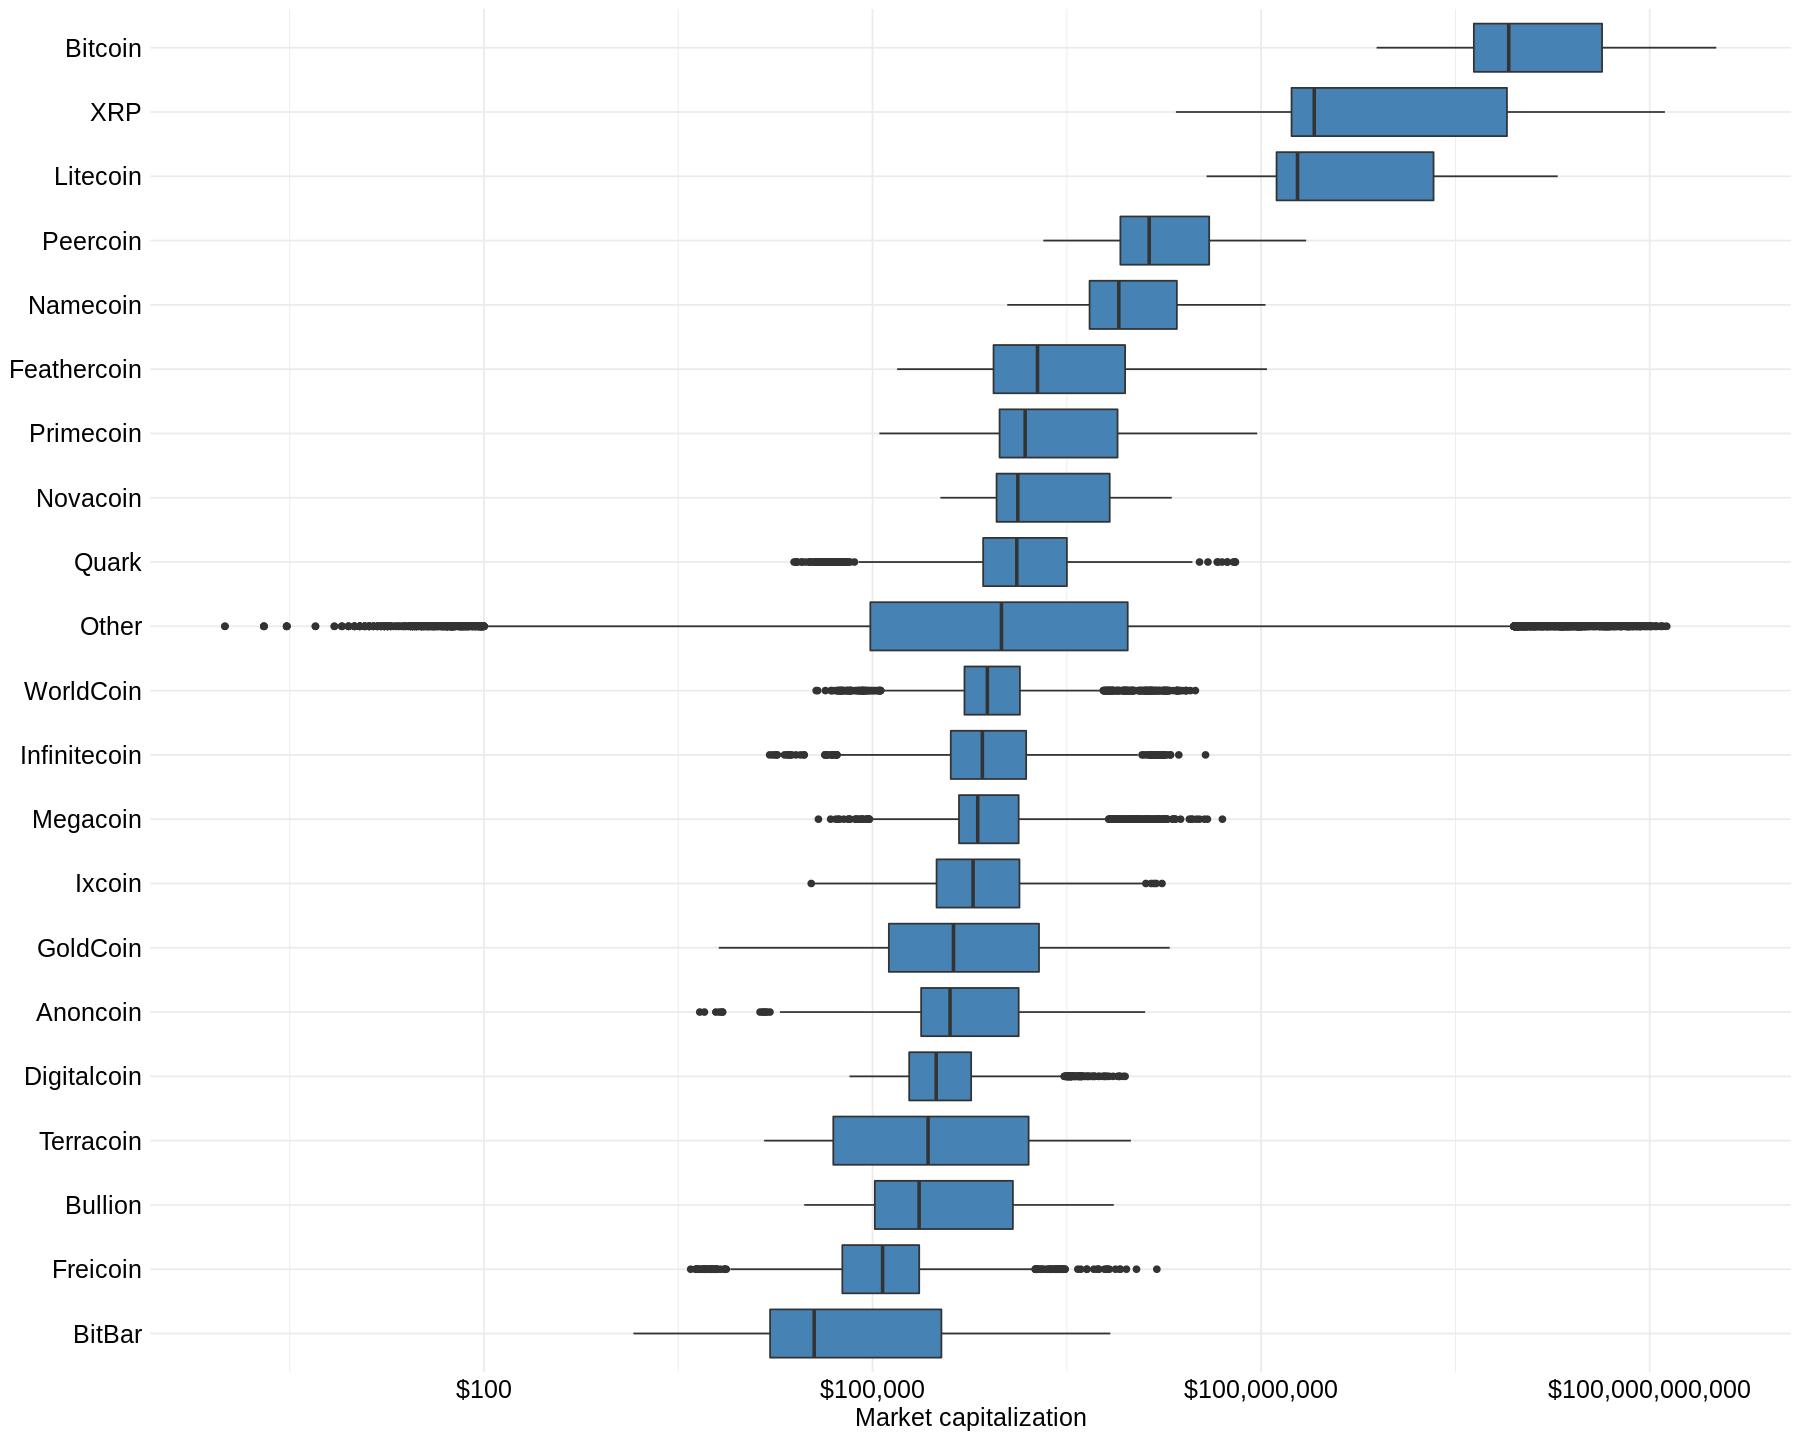

In [ ]:
df %>%
  mutate(name = fct_lump(name, 20)) %>%
  group_by(name) %>%
  summarise(date = max(date),
            market = market) %>%
  filter(!is.na(market),
         market > 0) %>%
  ggplot(aes(x = market, y = fct_reorder(name, market))) +
  geom_boxplot(fill = "steelblue")  +
  scale_x_log10(labels = scales::dollar) +
  ylab(NULL) +
  xlab("Market capitalization") +
  theme_crypto()

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



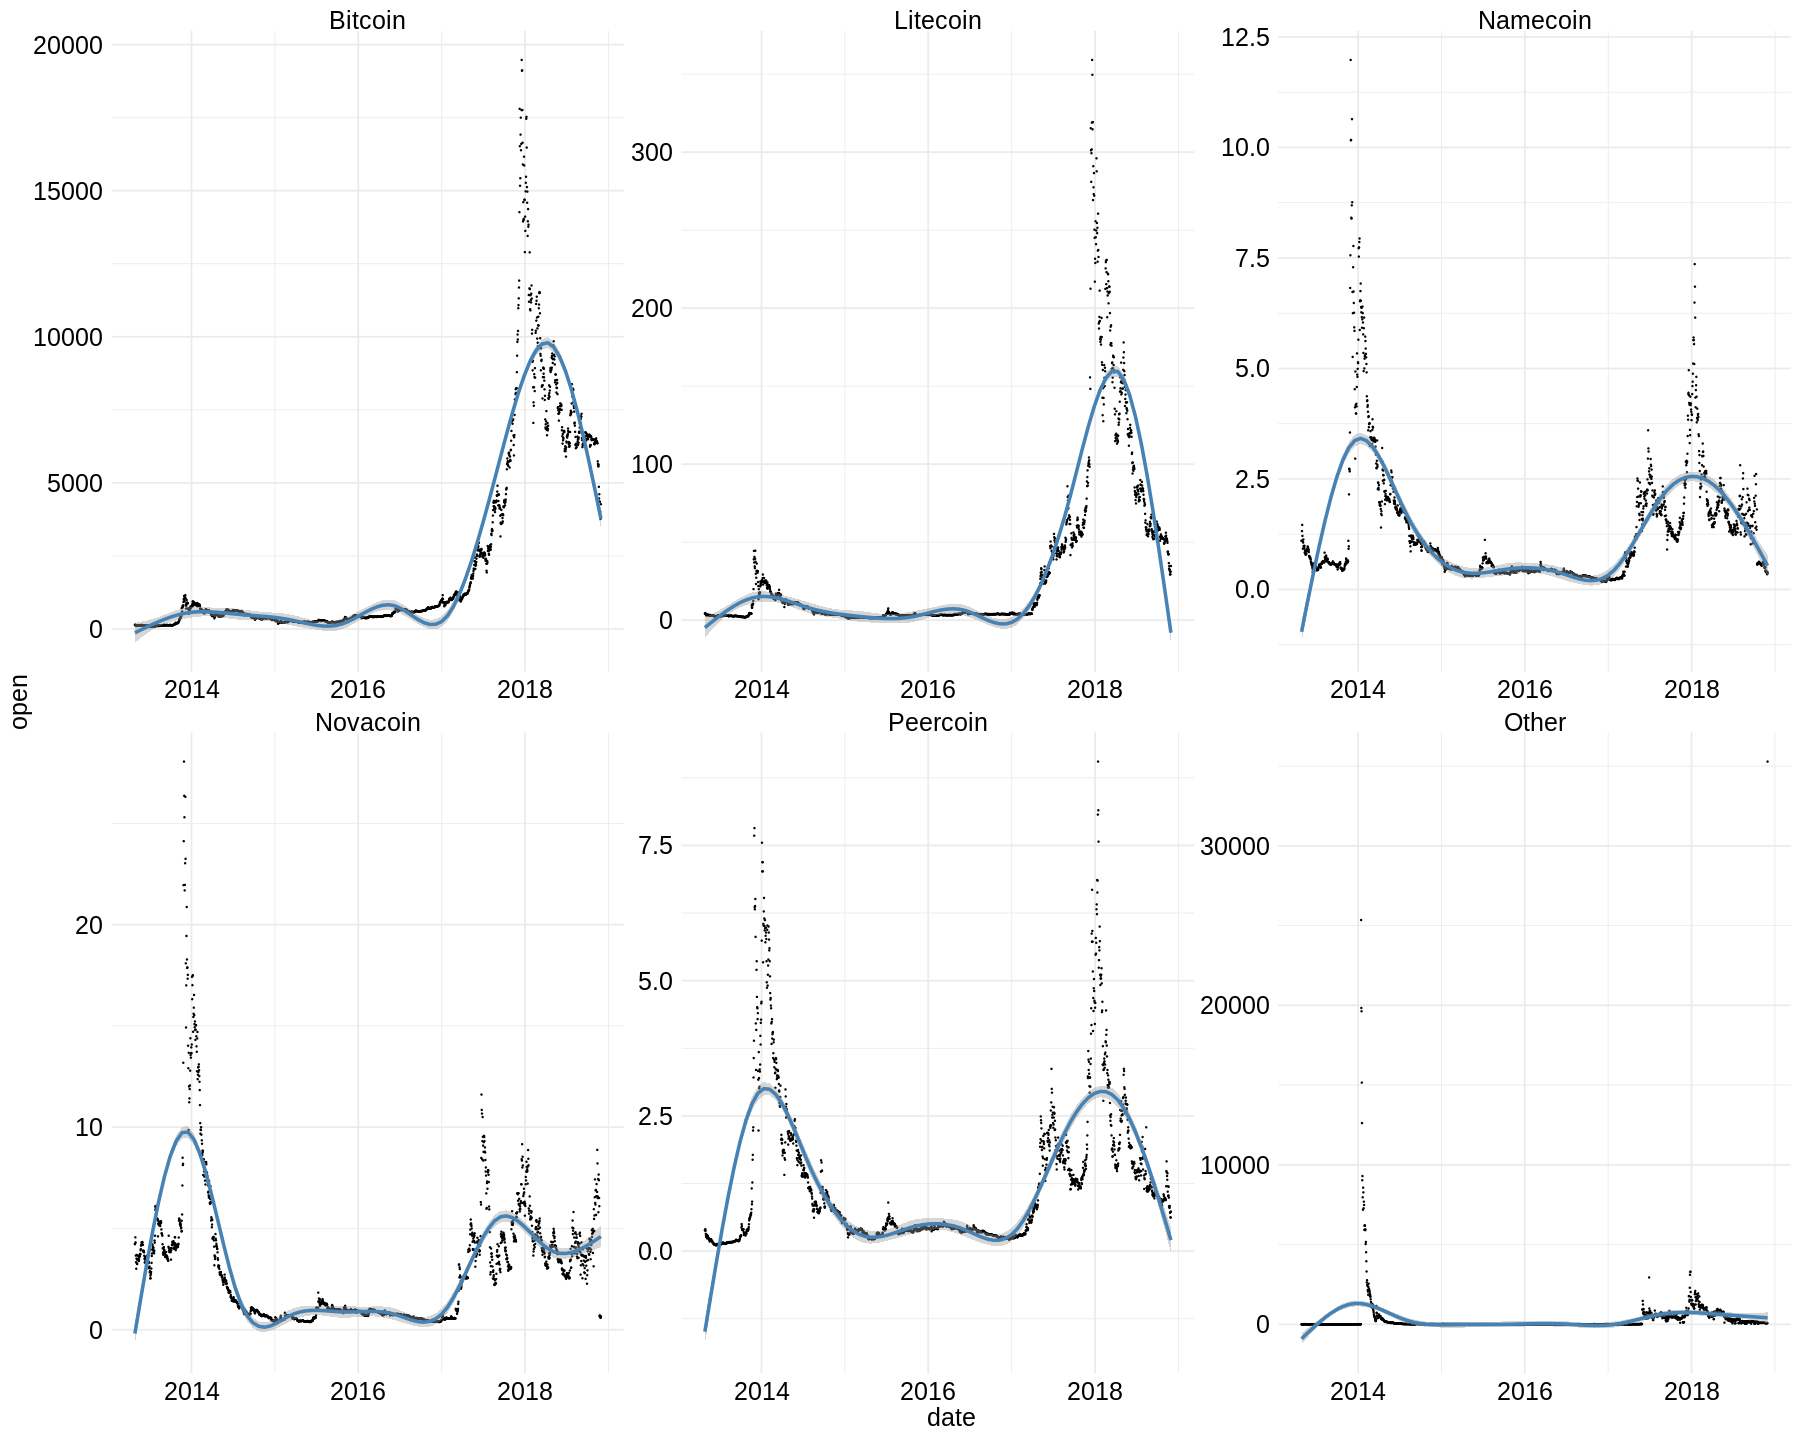

In [ ]:
df %>%
  mutate(name = fct_lump(name, 5)) %>%
  group_by(name, date) %>%
  summarise(open = mean(open)) %>%
  ggplot(aes(x = date, y = open)) +
  geom_point(size = 0.05) +
  geom_smooth(color = 'steelblue') +
  #scale_y_log10()+
  facet_wrap(name ~ ., scales = "free") +
  theme_crypto()

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.



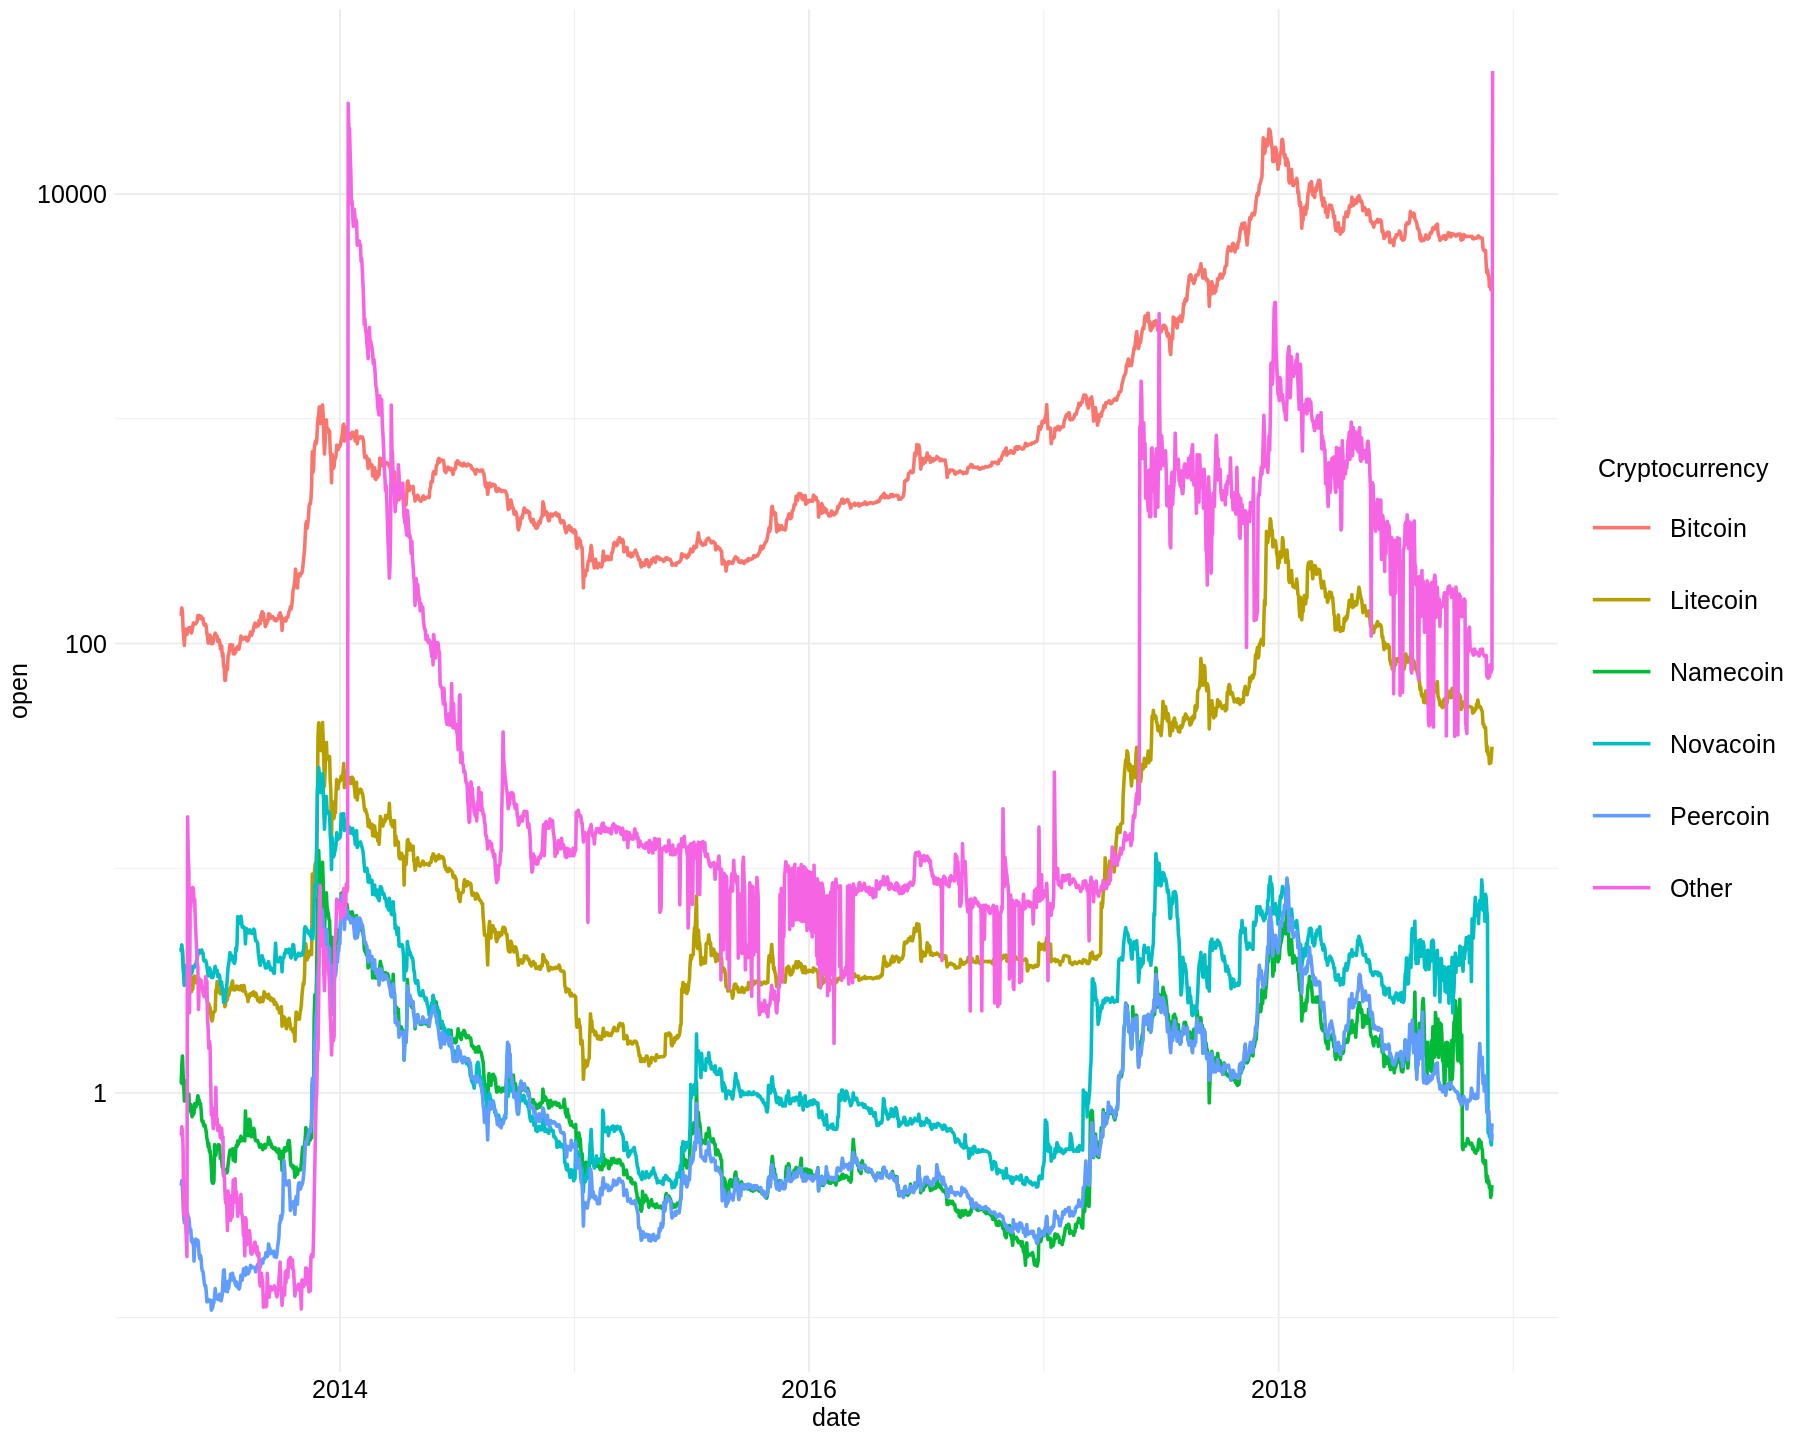

In [ ]:
df %>%
  mutate(name = fct_lump(name, 5)) %>%
  group_by(name, date) %>%
  summarise(open = mean(open)) %>%
  ggplot(aes(x = date, y = open, color = name)) +
  #geom_smooth() +
  geom_line(size = 1) +
  #geom_point(size = 0.00005) +
  scale_y_log10() +
  scale_color_discrete(name = "Cryptocurrency") +
  theme_crypto()

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



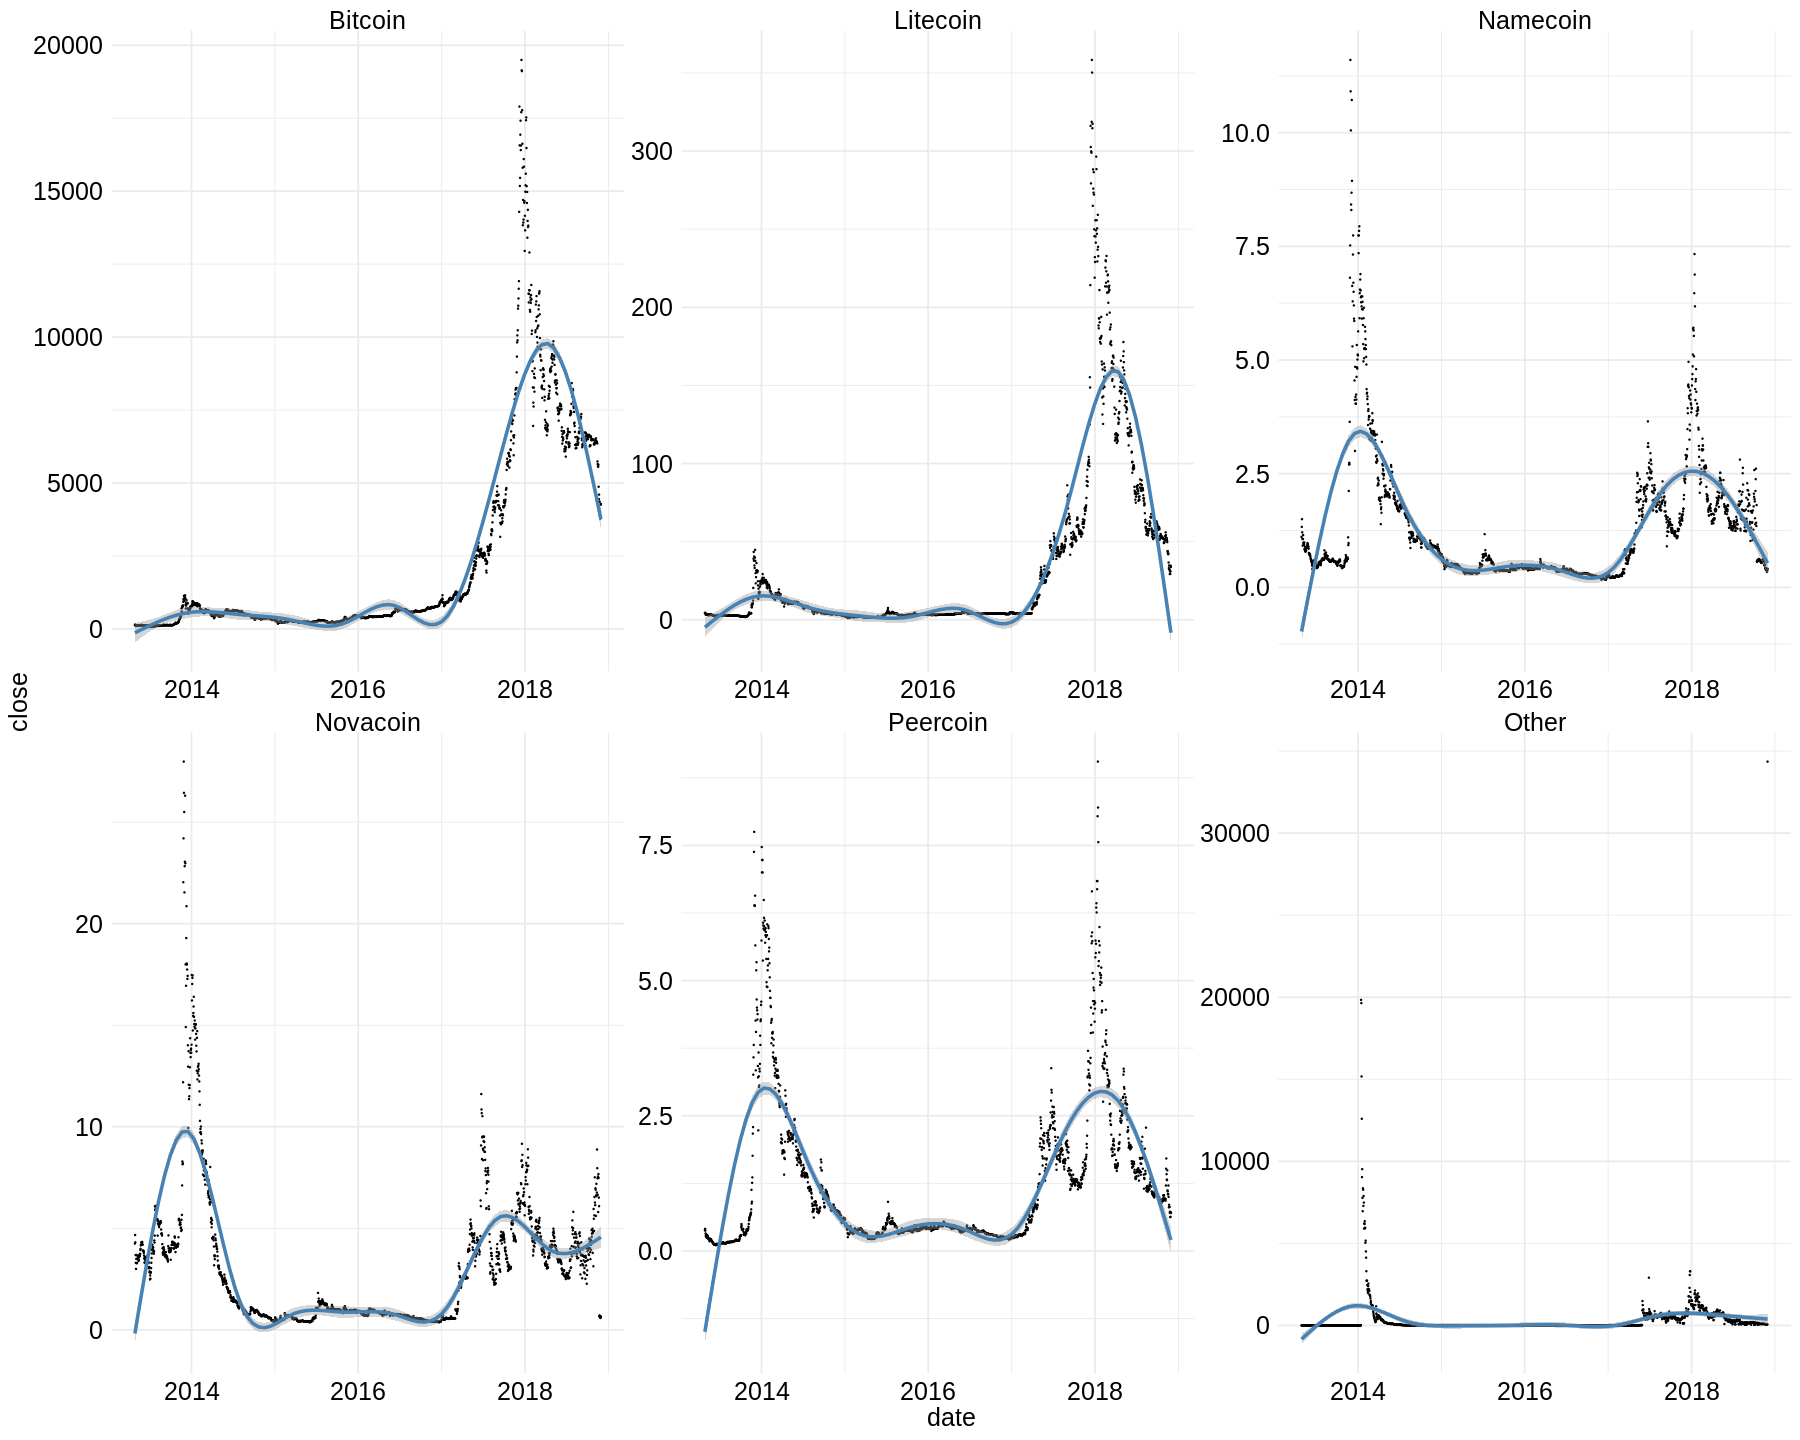

In [ ]:
df %>%
  mutate(name = fct_lump(name, 5)) %>%
  group_by(name, date) %>%
  summarise(close = mean(close)) %>%
  ggplot(aes(x = date, y = close)) +
  geom_point(size = 0.05) +
  geom_smooth(color = 'steelblue') +
  #scale_y_log10()+
  facet_wrap(name ~ ., scales = "free") +
  theme_crypto()

In [ ]:
latest_market_caps <- df %>%
  group_by(name) %>%
  filter(date == max(date)) %>%
  ungroup() %>%
  arrange(-market)

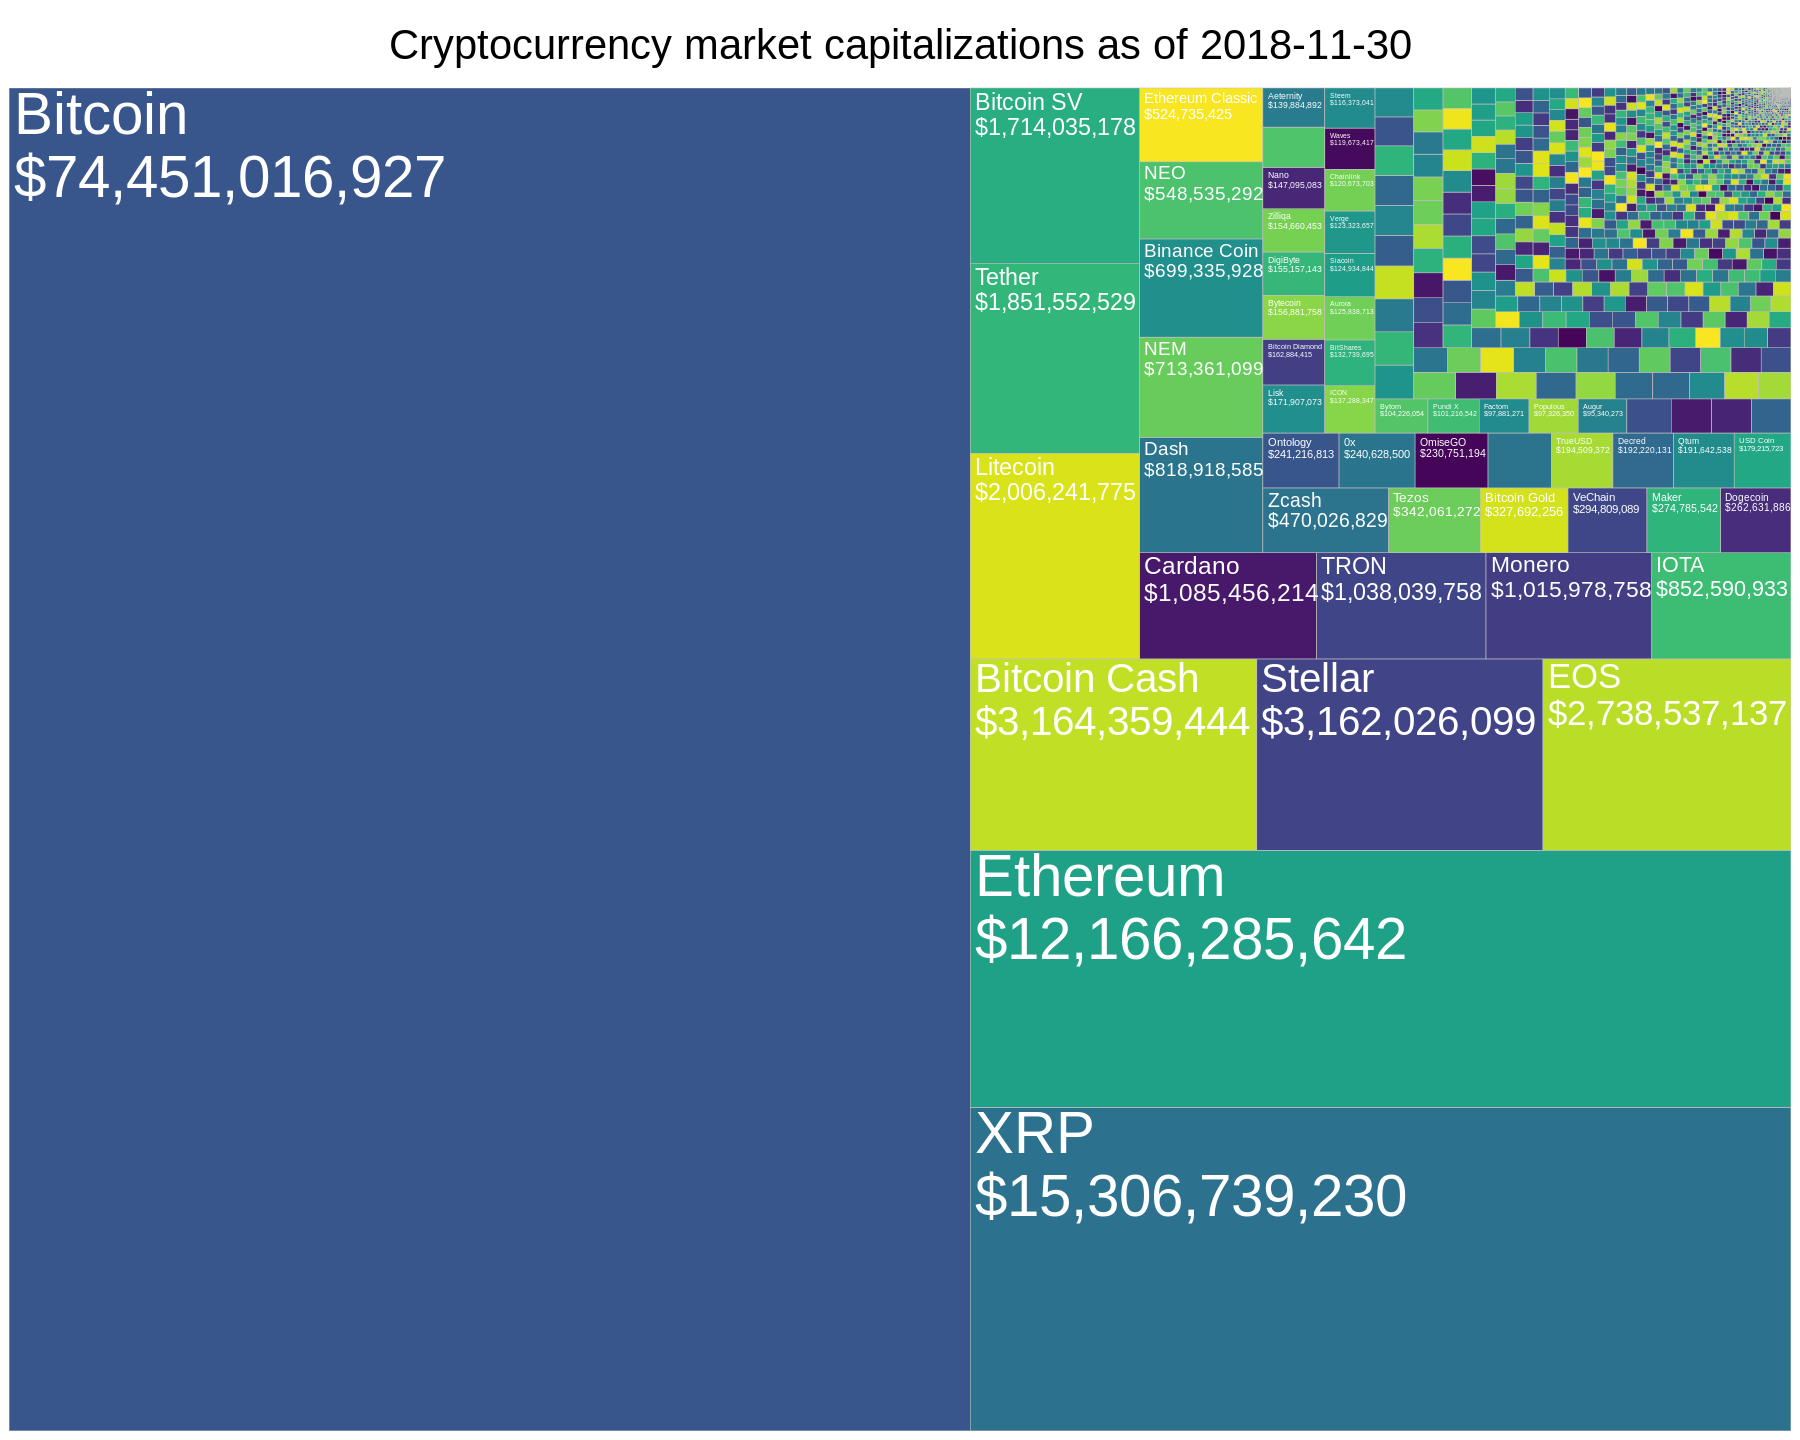

In [ ]:
set.seed(1)

latest_market_caps %>%
  ggplot(aes(area = market, 
             fill = runif(length(unique(df$name))),
             label = paste(name, dollar_format()(market), sep = "\n"))) +
  geom_treemap() +
  geom_treemap_text(color = "white", size = 35) +
  ggtitle(paste("Cryptocurrency market capitalizations as of", max(df$date))) +
  scale_fill_viridis() +
  theme(legend.position = "none")

Warning message:
“Transformation introduced infinite values in continuous y-axis”


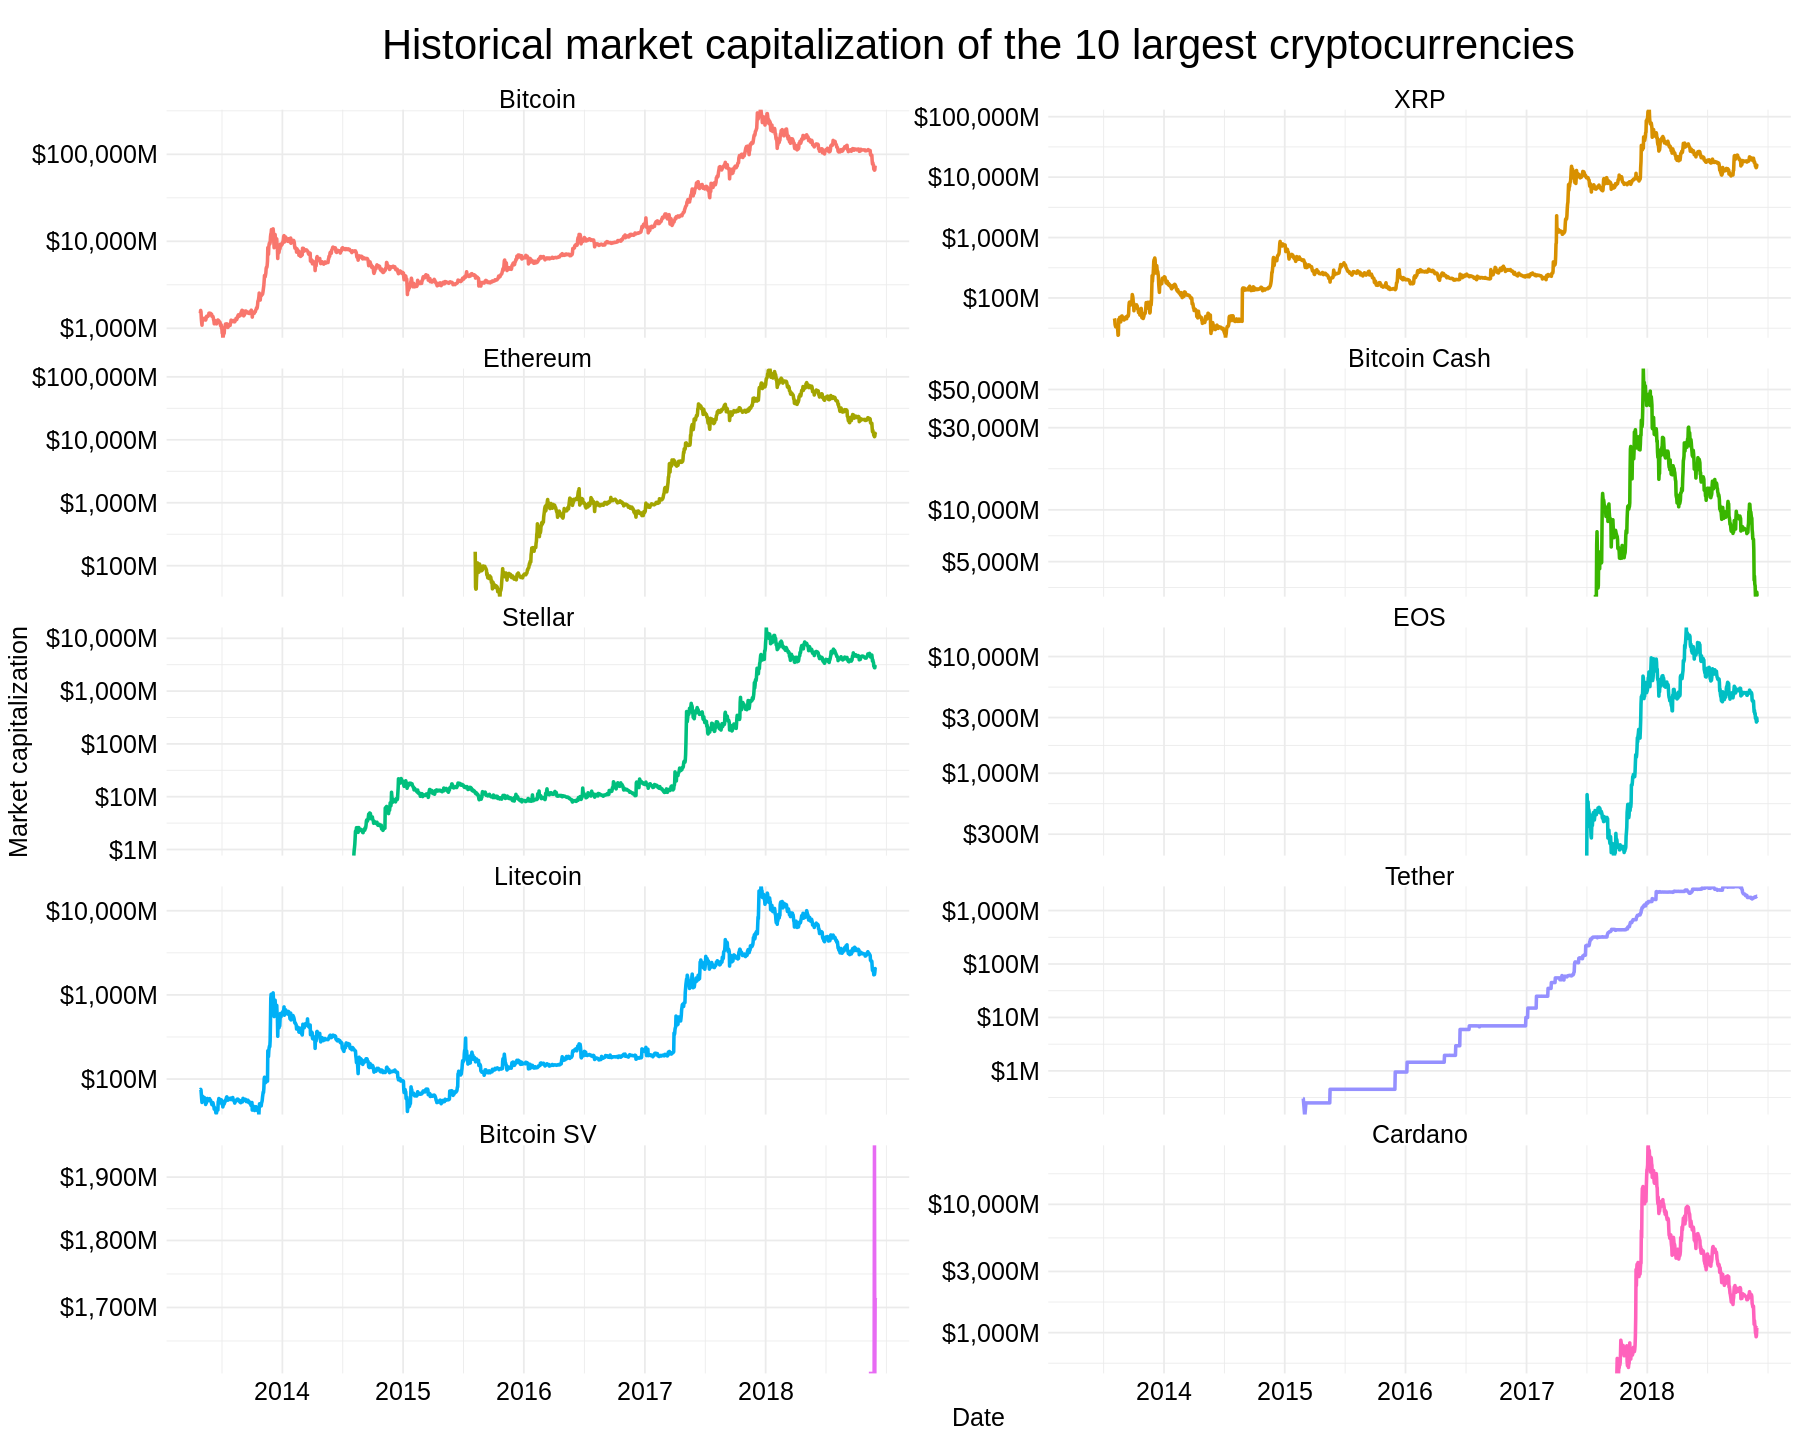

In [ ]:
df %>%
    filter(name %in% (latest_market_caps %>%
                          slice(1:10) %>%
                          pull(name))) %>%
    mutate(name = factor(name, levels = df %>% 
                             group_by(name) %>% 
                             slice(n()) %>% 
                             arrange(-market) %>% 
                             pull(name))) %>%
    ggplot(aes(date, market, color = name)) +
    geom_line(size = 1) +
    facet_wrap(~name, scales = "free_y", ncol = 2) +
    scale_x_date(breaks = plot_years, labels = year(plot_years)) +
    scale_y_log10(labels = m_scale, expand = c(0.1, NA)) +
    #expand_limits(y = 0) +
    ggtitle("Historical market capitalization of the 10 largest cryptocurrencies") + 
    xlab("Date") +
    ylab("Market capitalization") +
    theme(legend.position = "none")

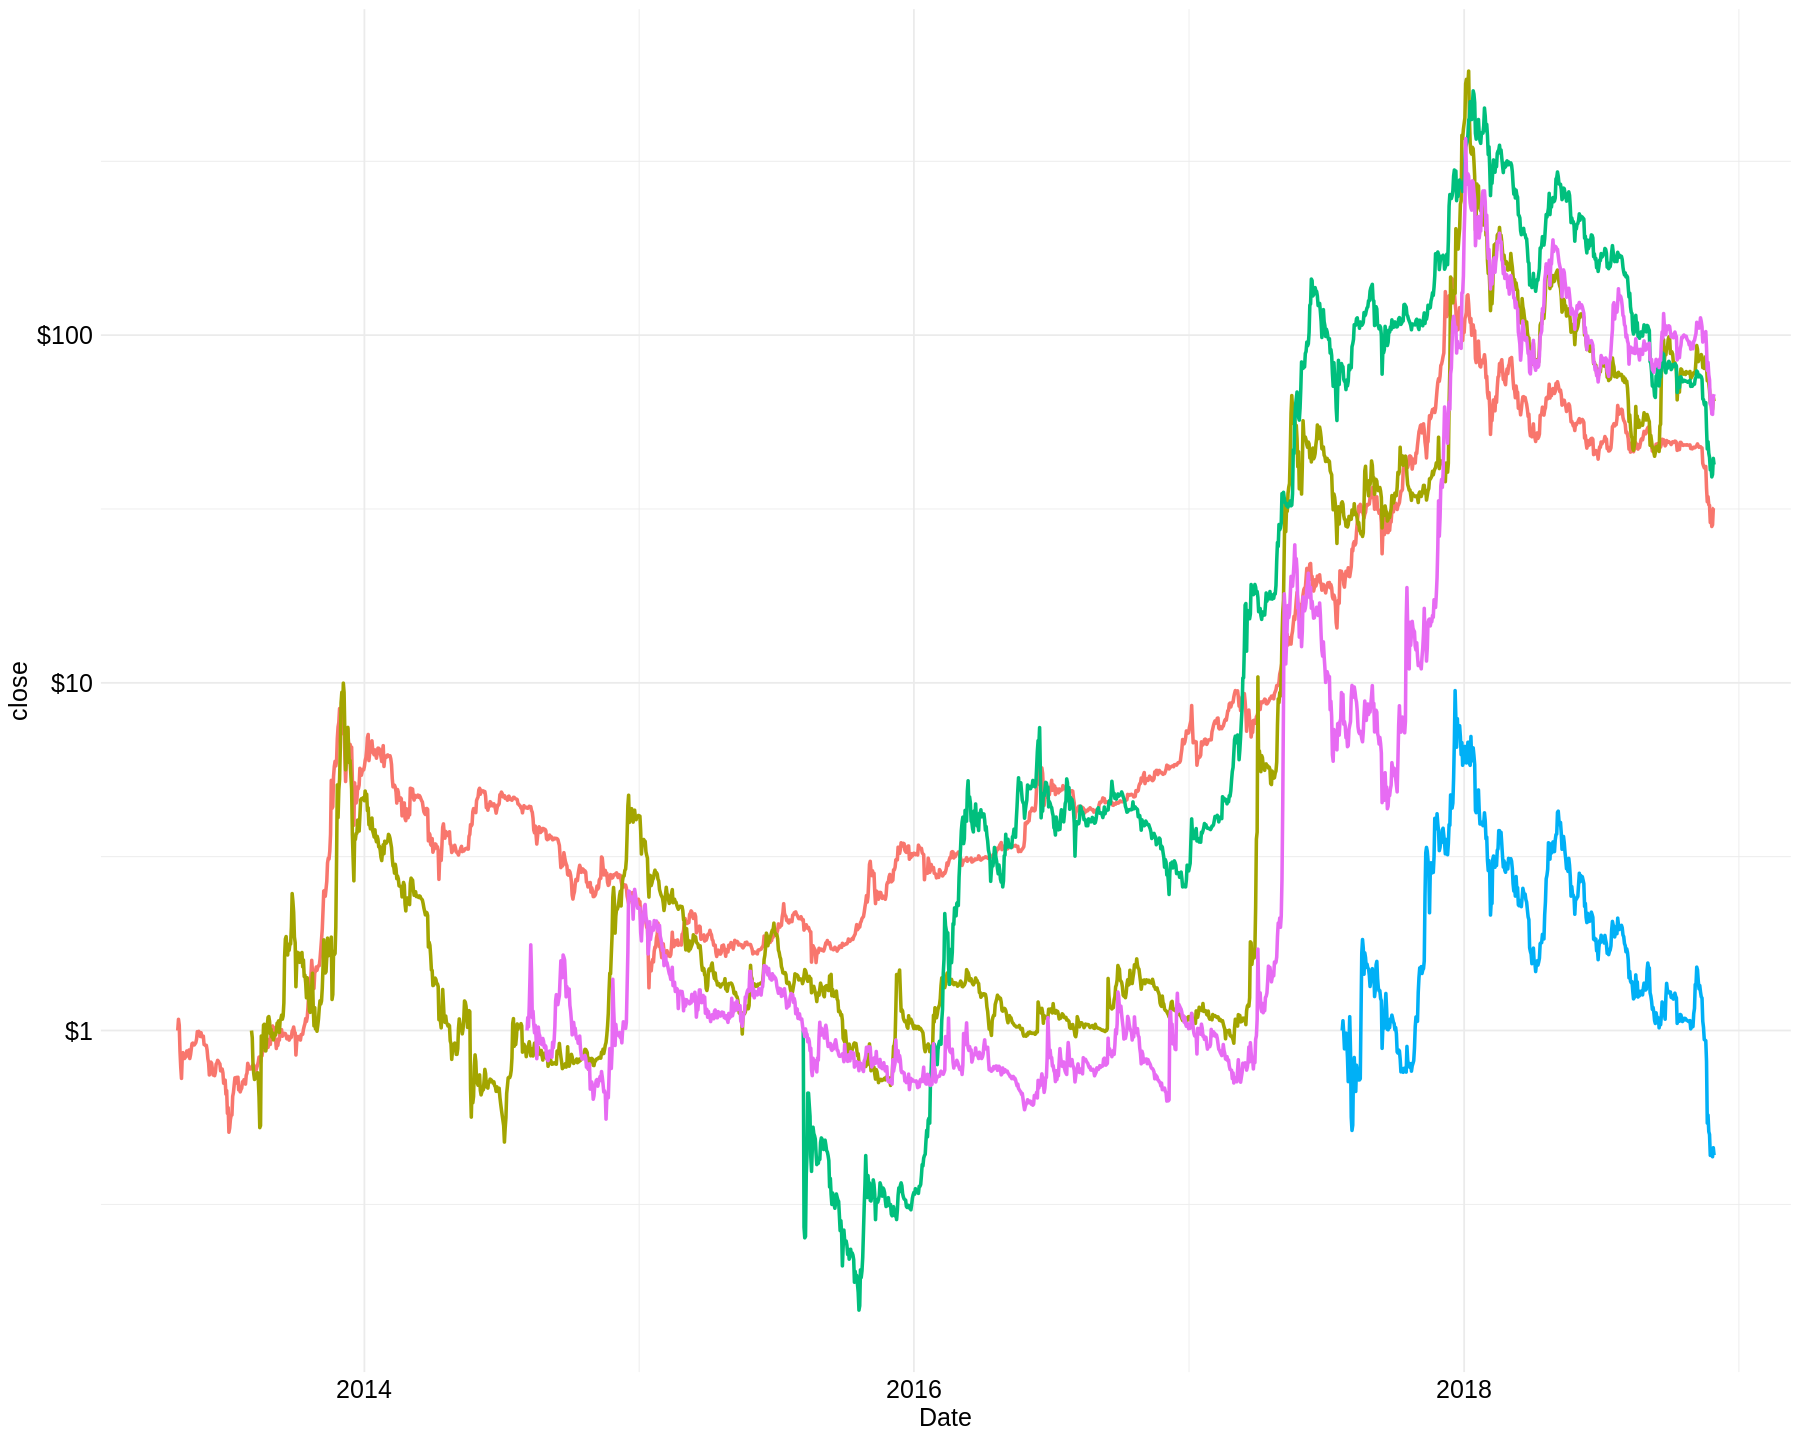

In [ ]:
df %>%
    filter(name %in% (latest_market_caps %>%
                          slice(1:5) %>%
                          pull(name))) %>%
    mutate(name = factor(name, levels = df %>% 
                             group_by(name) %>% 
                             slice(n()) %>% 
                             arrange(-market) %>% 
                             pull(name))) %>%
    group_by(name) %>%
    arrange(date) %>%
    mutate(close = close / first(close)) %>%
    ggplot(aes(date, close, color = name)) +
    geom_line(size = 1) +
    #facet_wrap(~name, scales = "free_y", ncol = 2) +
    scale_y_log10(labels = scales::dollar) +
    #expand_limits(y = 0) +
    #ggtitle("Historical market capitalization of the 10 largest cryptocurrencies") + 
    xlab("Date") +
    #ylab("Market capitalization") +
    theme(legend.position = "none")

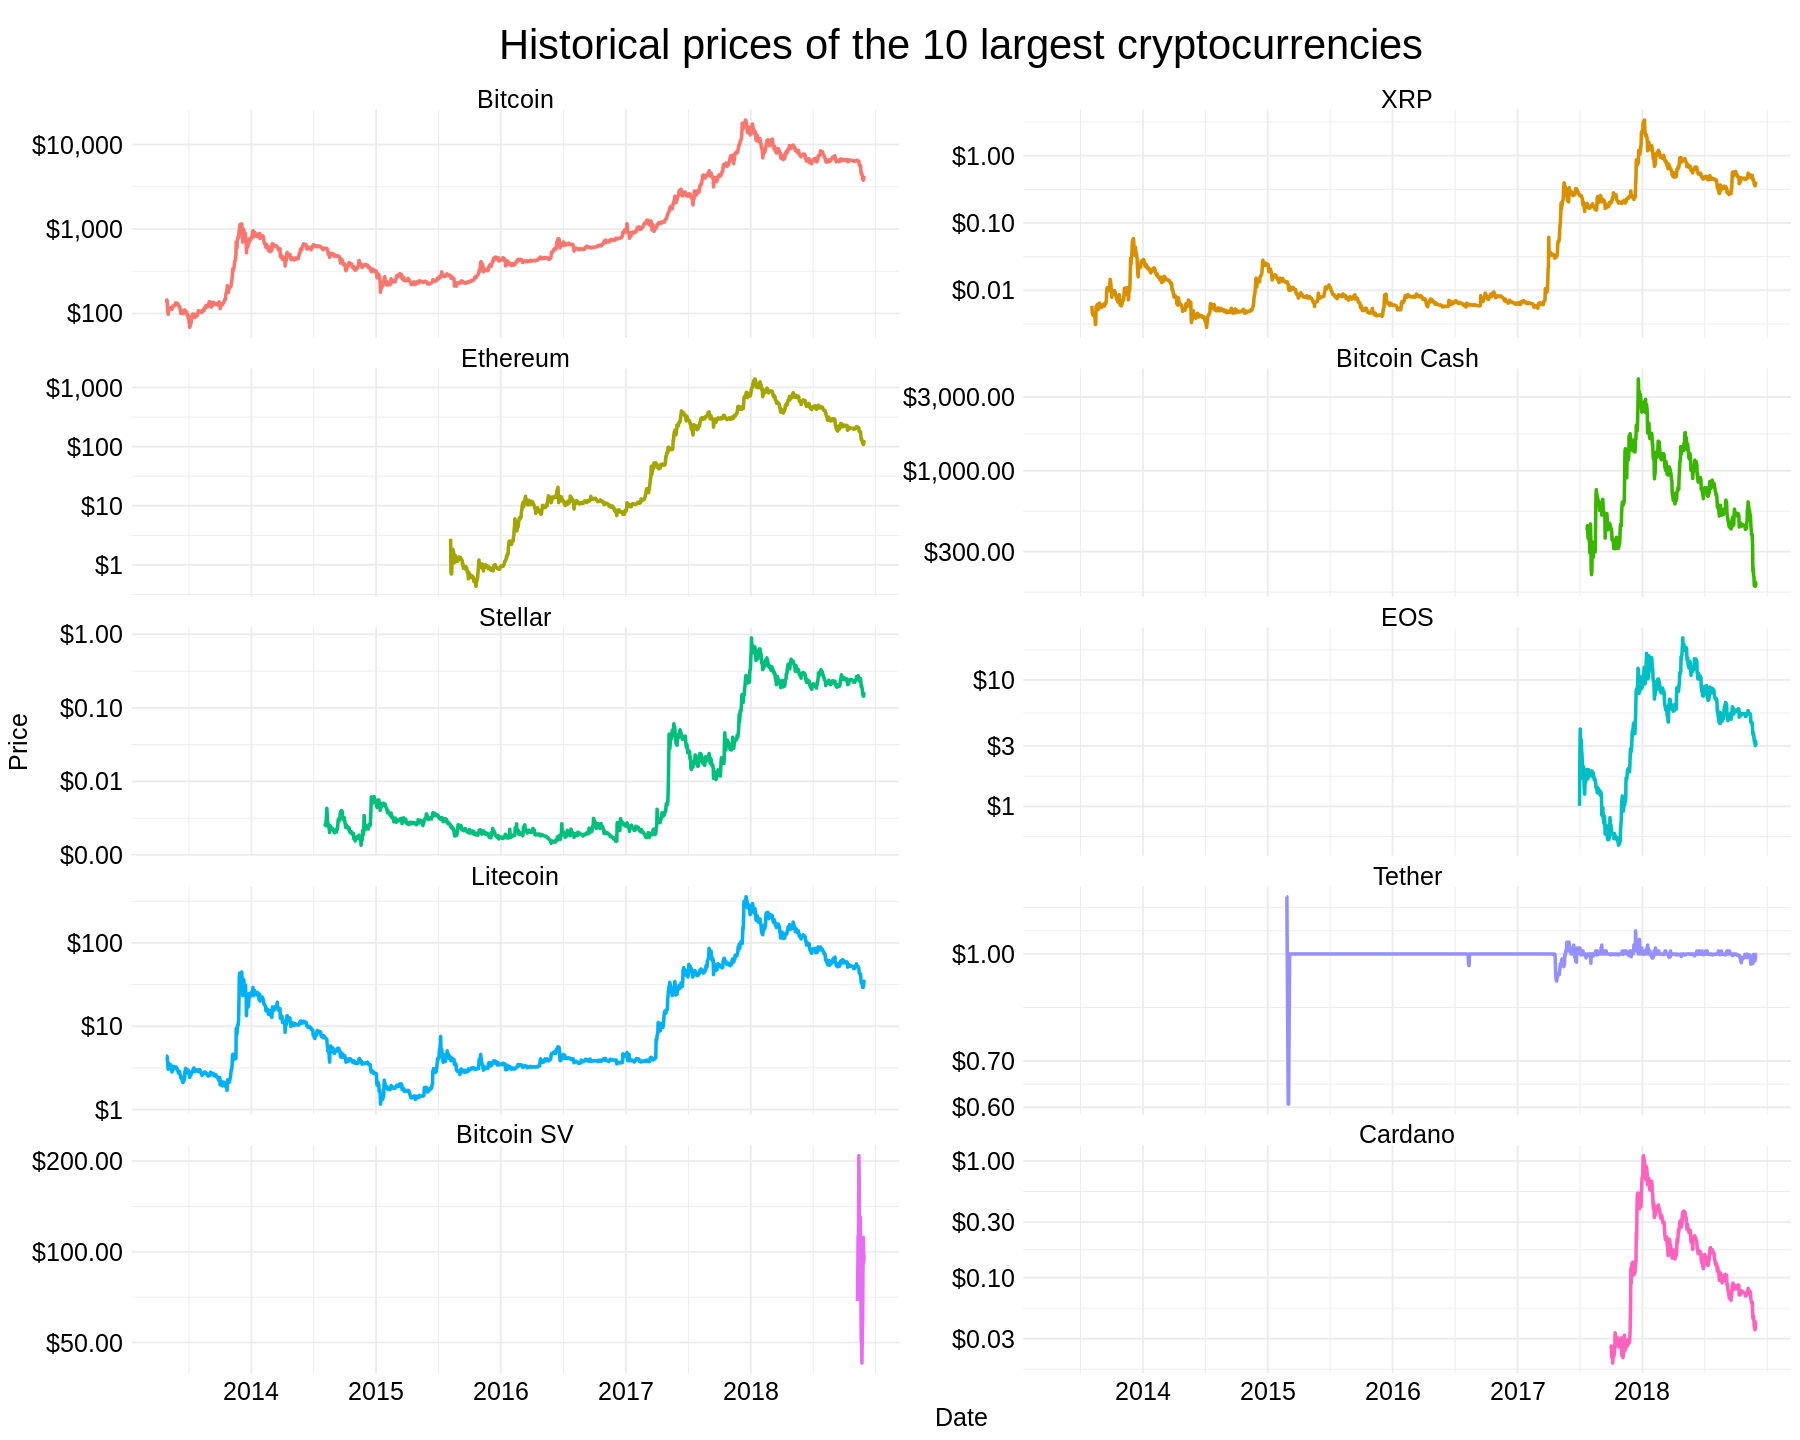

In [ ]:
df %>%
    filter(name %in% (latest_market_caps %>%
                          slice(1:10) %>%
                          pull(name))) %>%
    mutate(name = factor(name, levels = df %>% 
                             group_by(name) %>% 
                             slice(n()) %>% 
                             arrange(-market) %>% 
                             pull(name))) %>%
    ggplot(aes(date, close, color = name)) +
    geom_line(size = 1) +
    facet_wrap(~name, scales = "free_y", ncol = 2) +
    scale_x_date(breaks = plot_years, labels = year(plot_years)) +
    scale_y_log10(labels = scales::dollar) +
    ggtitle("Historical prices of the 10 largest cryptocurrencies") + 
    xlab("Date") +
    ylab("Price") +
    theme(legend.position = "none")

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.

Warning message:
“Transformation introduced infinite values in continuous y-axis”


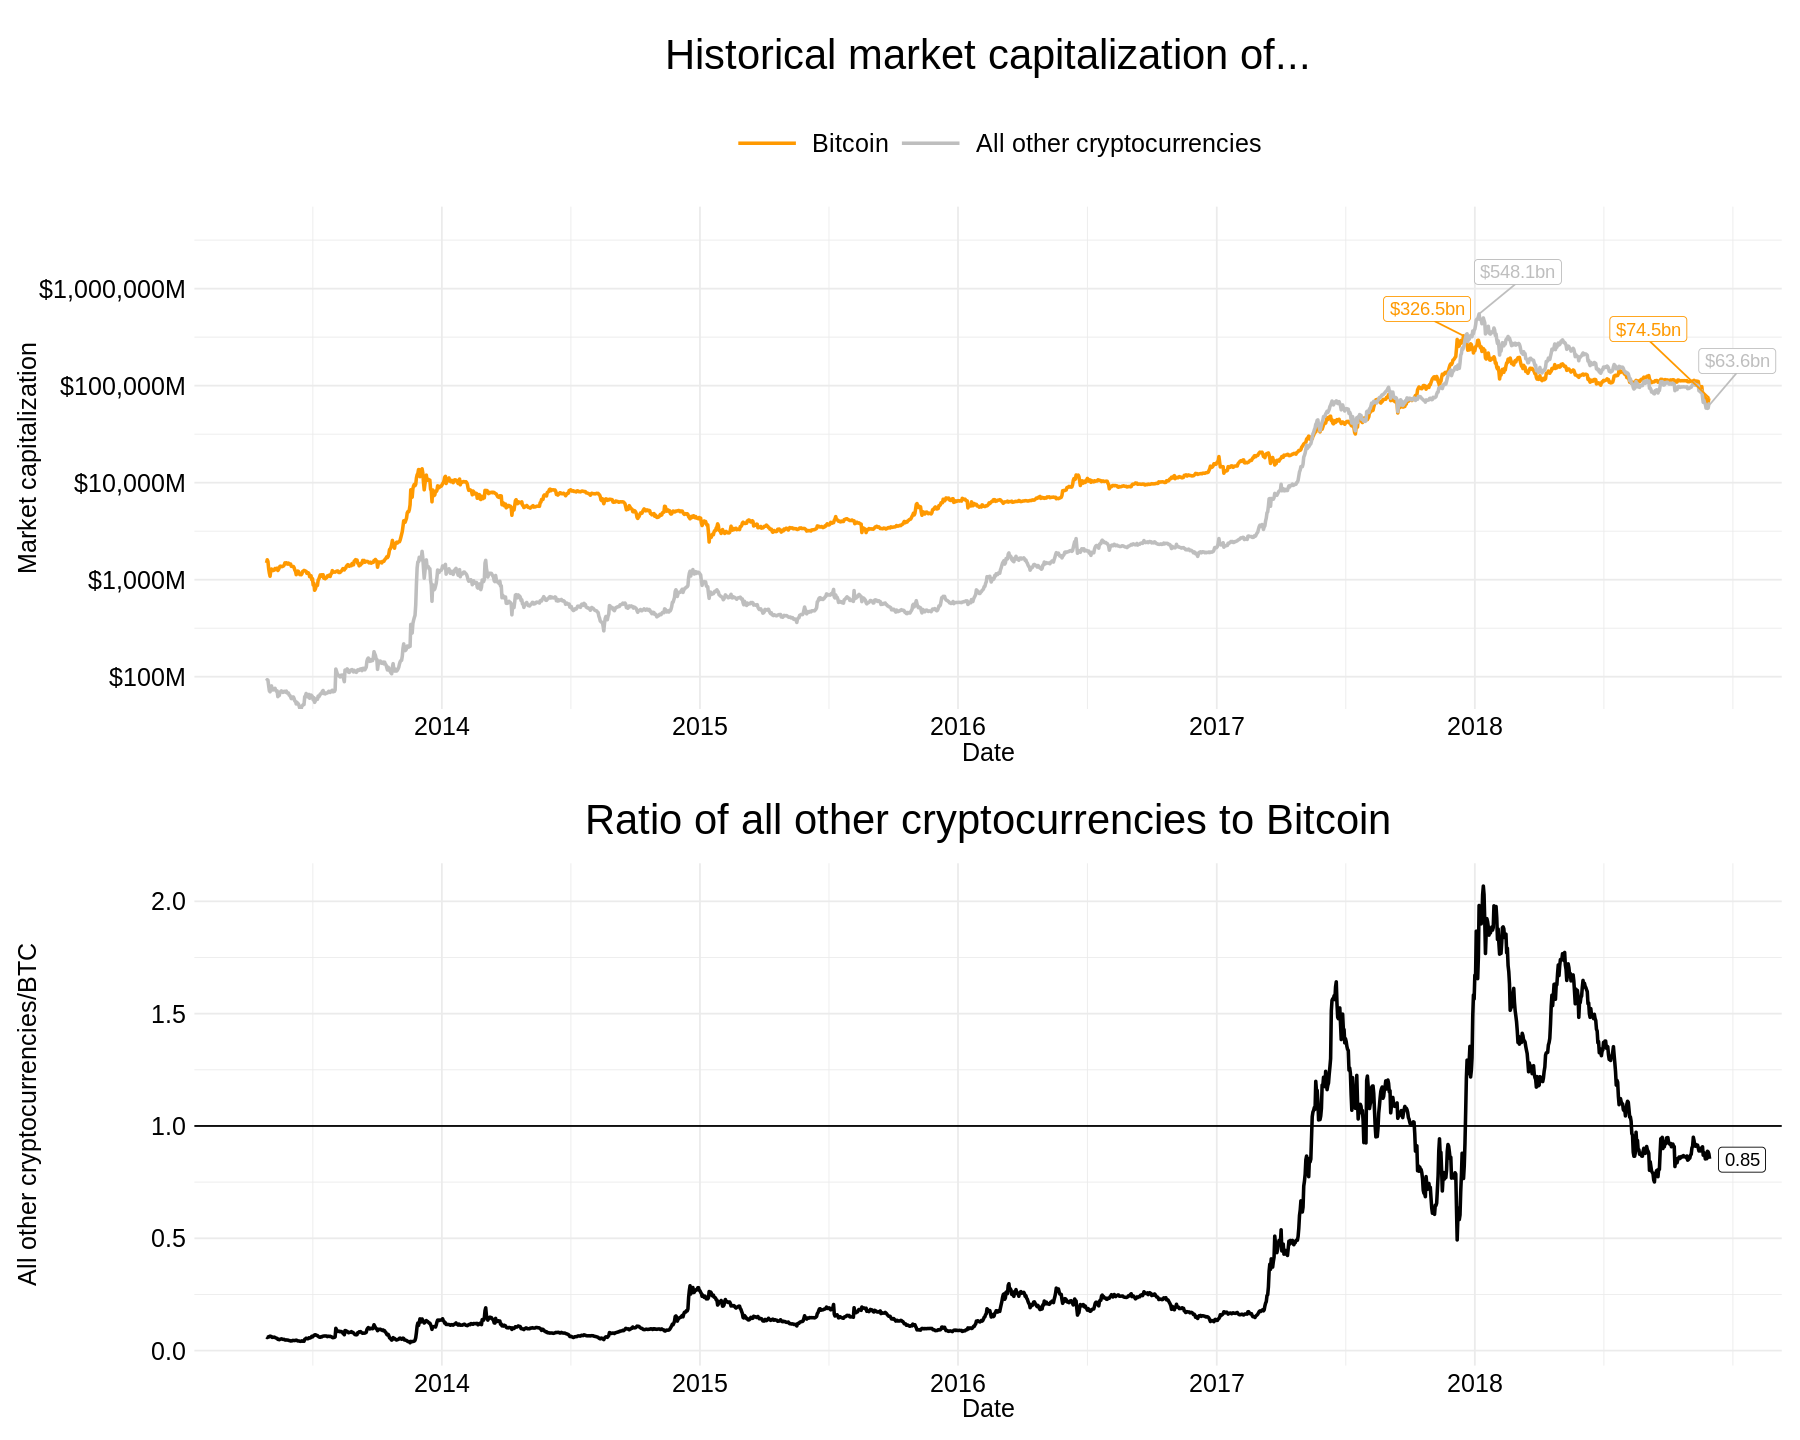

In [ ]:
 bitcoin_vs_other <- df %>%
    mutate(name = ifelse(name == "Bitcoin", "Bitcoin", "All other cryptocurrencies"),
           name = factor(name, levels = c("Bitcoin", "All other cryptocurrencies"))) %>%
    group_by(name, date) %>%
    summarize(market = sum(market)) %>%
    # Remove date with almost no observations
    filter(date != "2018-11-30")

set.seed(1)
bitcoin_vs_other_plot <- bitcoin_vs_other %>%
    ggplot(aes(x = date, y = market, color = name)) +
    geom_line(size = 1) +
    geom_label_repel(data = bitcoin_vs_other %>%
                  filter(date == last(date)),
                  aes(label = bn_scale(market)),
                  nudge_x = 0.5,
                  nudge_y = 0.6,
                  show.legend = FALSE) + 
    geom_label_repel(data = bitcoin_vs_other %>%
                  filter(market == max(market)),
                  aes(label = bn_scale(market)),
                  nudge_x = 0.5,
                  nudge_y = 0.35,
                  show.legend = FALSE) + 
    scale_x_date(breaks = plot_years, labels = year(plot_years)) +
    scale_y_log10(labels = m_scale, expand = c(0.1, NA)) +
    scale_color_manual(values = c(bitcoin_color, "gray")) +
    expand_limits(y = c(0, 7e12)) +
    ggtitle("Historical market capitalization of...") + 
    xlab("Date") +
    ylab("Market capitalization") +
    theme_crypto() +
    theme(legend.position = "top", legend.title = element_blank())

bitcoin_ratio_plot <- bitcoin_vs_other %>%
    pivot_wider(values_from = market, names_from = name) %>%
    mutate(ratio = `All other cryptocurrencies` / Bitcoin) %>%
    ggplot(aes(date, ratio)) +
    geom_line(size = 1) +
    geom_hline(yintercept = 1) +
    geom_label_repel(data = . %>%
                  filter(date == last(date)) %>%
                  mutate(ratio = round(ratio, 2)),
                  aes(label = ratio),
                  nudge_x = 25) + 
    scale_x_date(breaks = plot_years, labels = year(plot_years)) +
    #expand_limits(y = 0) +
    ggtitle("Ratio of all other cryptocurrencies to Bitcoin") + 
    xlab("Date") +
    ylab("All other cryptocurrencies/BTC") + 
    theme(legend.position = "top", legend.title = element_blank())

    bitcoin_vs_other_plot / bitcoin_ratio_plot

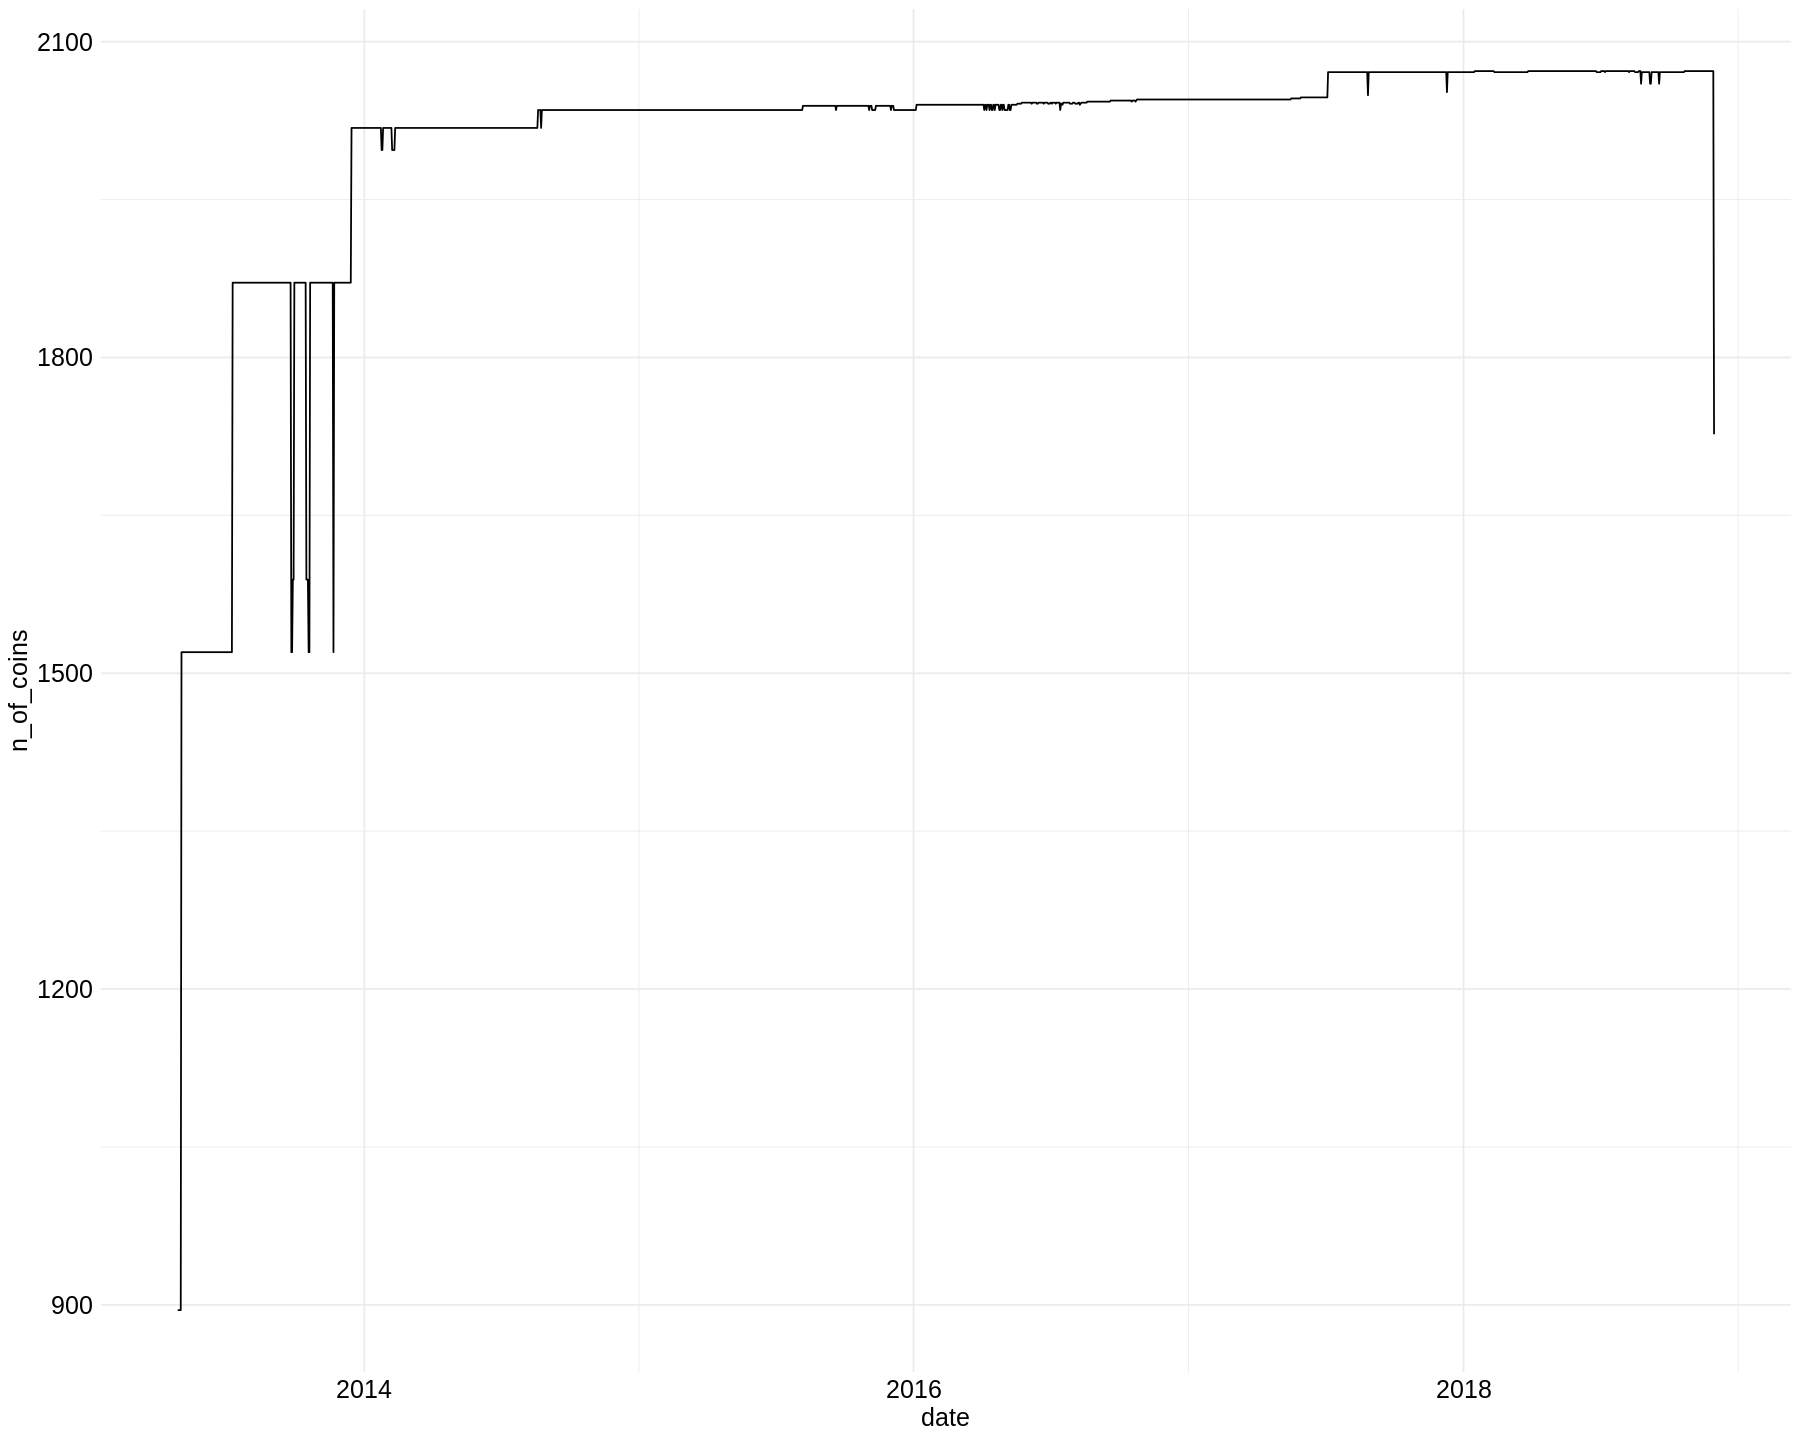

In [ ]:
df %>% 
  group_by(date) %>%
  summarise(n_of_coins = max(ranknow)) %>%
  ggplot(aes(date, n_of_coins)) +
  geom_line()

In [ ]:
df %>% 
  mutate(year = year(date),
         month = month(date)) %>%
  group_by(name, year, month) %>%
  summarise(low = low,
            high = high,
            low_last_month = lag(low),
            high_last_month = lag(high),
            h = high / low_last_month,
            l = high_last_month / low) %>%
  ungroup() %>%
  summarise(min(l, na.rm = TRUE),
            max(l, na.rm = TRUE),
            min(h, na.rm = TRUE),
            max(h, na.rm = TRUE))

            250712.2
            977507.4
            0.001893825	
            0.0001242134

`summarise()` has grouped output by 'name', 'year', 'month'. You can override using the `.groups` argument.



"min(l, na.rm = TRUE)","max(l, na.rm = TRUE)","min(h, na.rm = TRUE)","max(h, na.rm = TRUE)"
<dbl>,<dbl>,<dbl>,<dbl>
0.001893825,250712.2,0.0001242134,977507.4


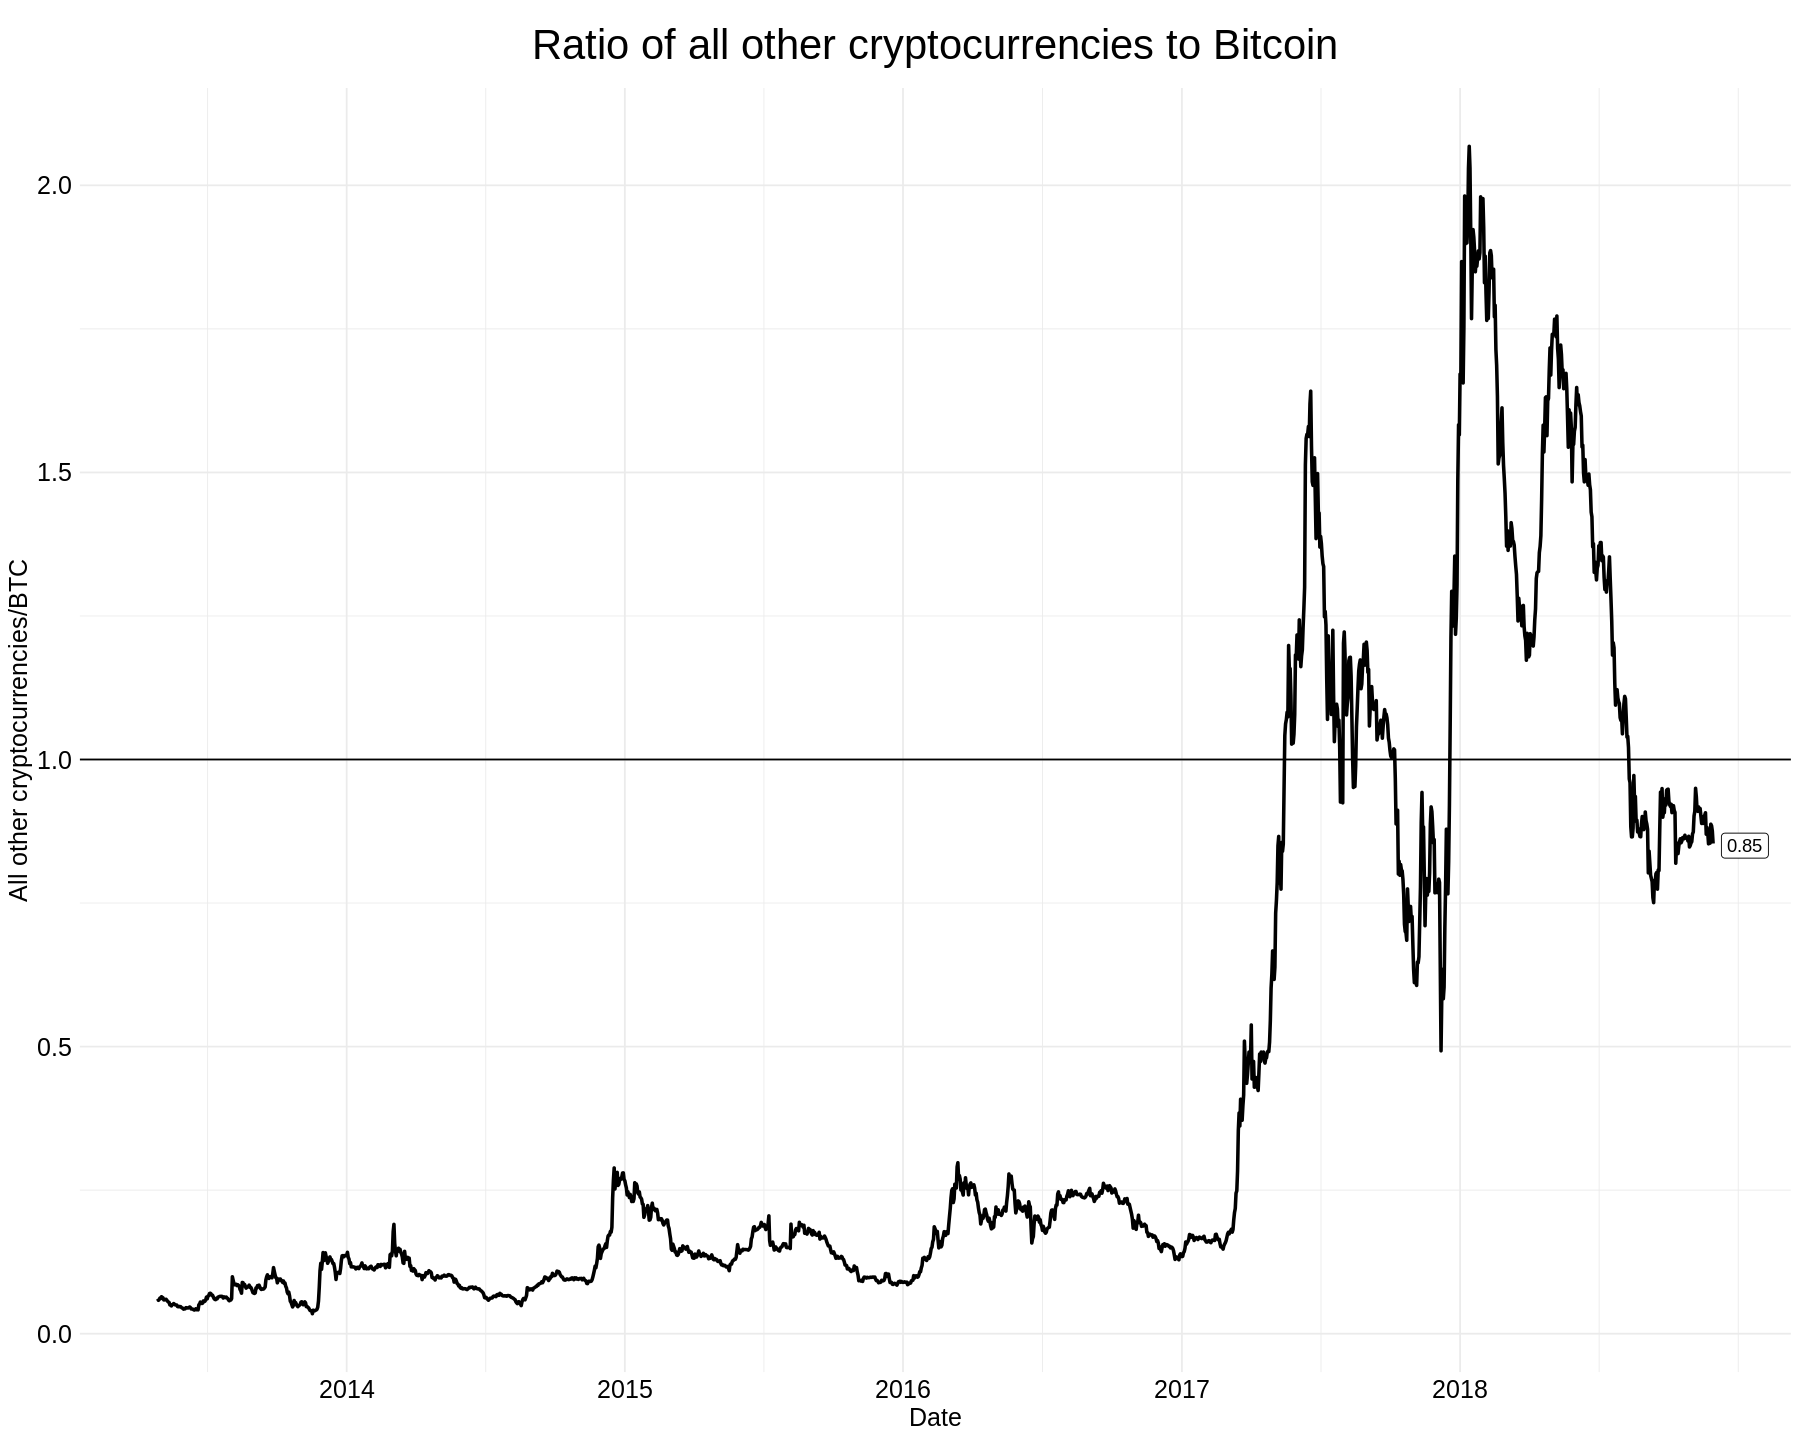

In [ ]:
bitcoin_vs_other %>%
    pivot_wider(values_from = market, names_from = name) %>%
    mutate(ratio = `All other cryptocurrencies` / Bitcoin) %>%
    ggplot(aes(date, ratio)) +
    geom_line(size = 1) +
    geom_hline(yintercept = 1) +
    geom_label_repel(data = . %>%
                  filter(date == last(date)) %>%
                  mutate(ratio = round(ratio, 2)),
                  aes(label = ratio),
                  nudge_x = 25) + 
    scale_x_date(breaks = plot_years, labels = year(plot_years)) +
    #expand_limits(y = 0) +
    ggtitle("Ratio of all other cryptocurrencies to Bitcoin") + 
    xlab("Date") +
    ylab("All other cryptocurrencies/BTC") +
    theme_crypto() +
    theme(legend.position = "top", legend.title = element_blank())

Joining, by = "name"



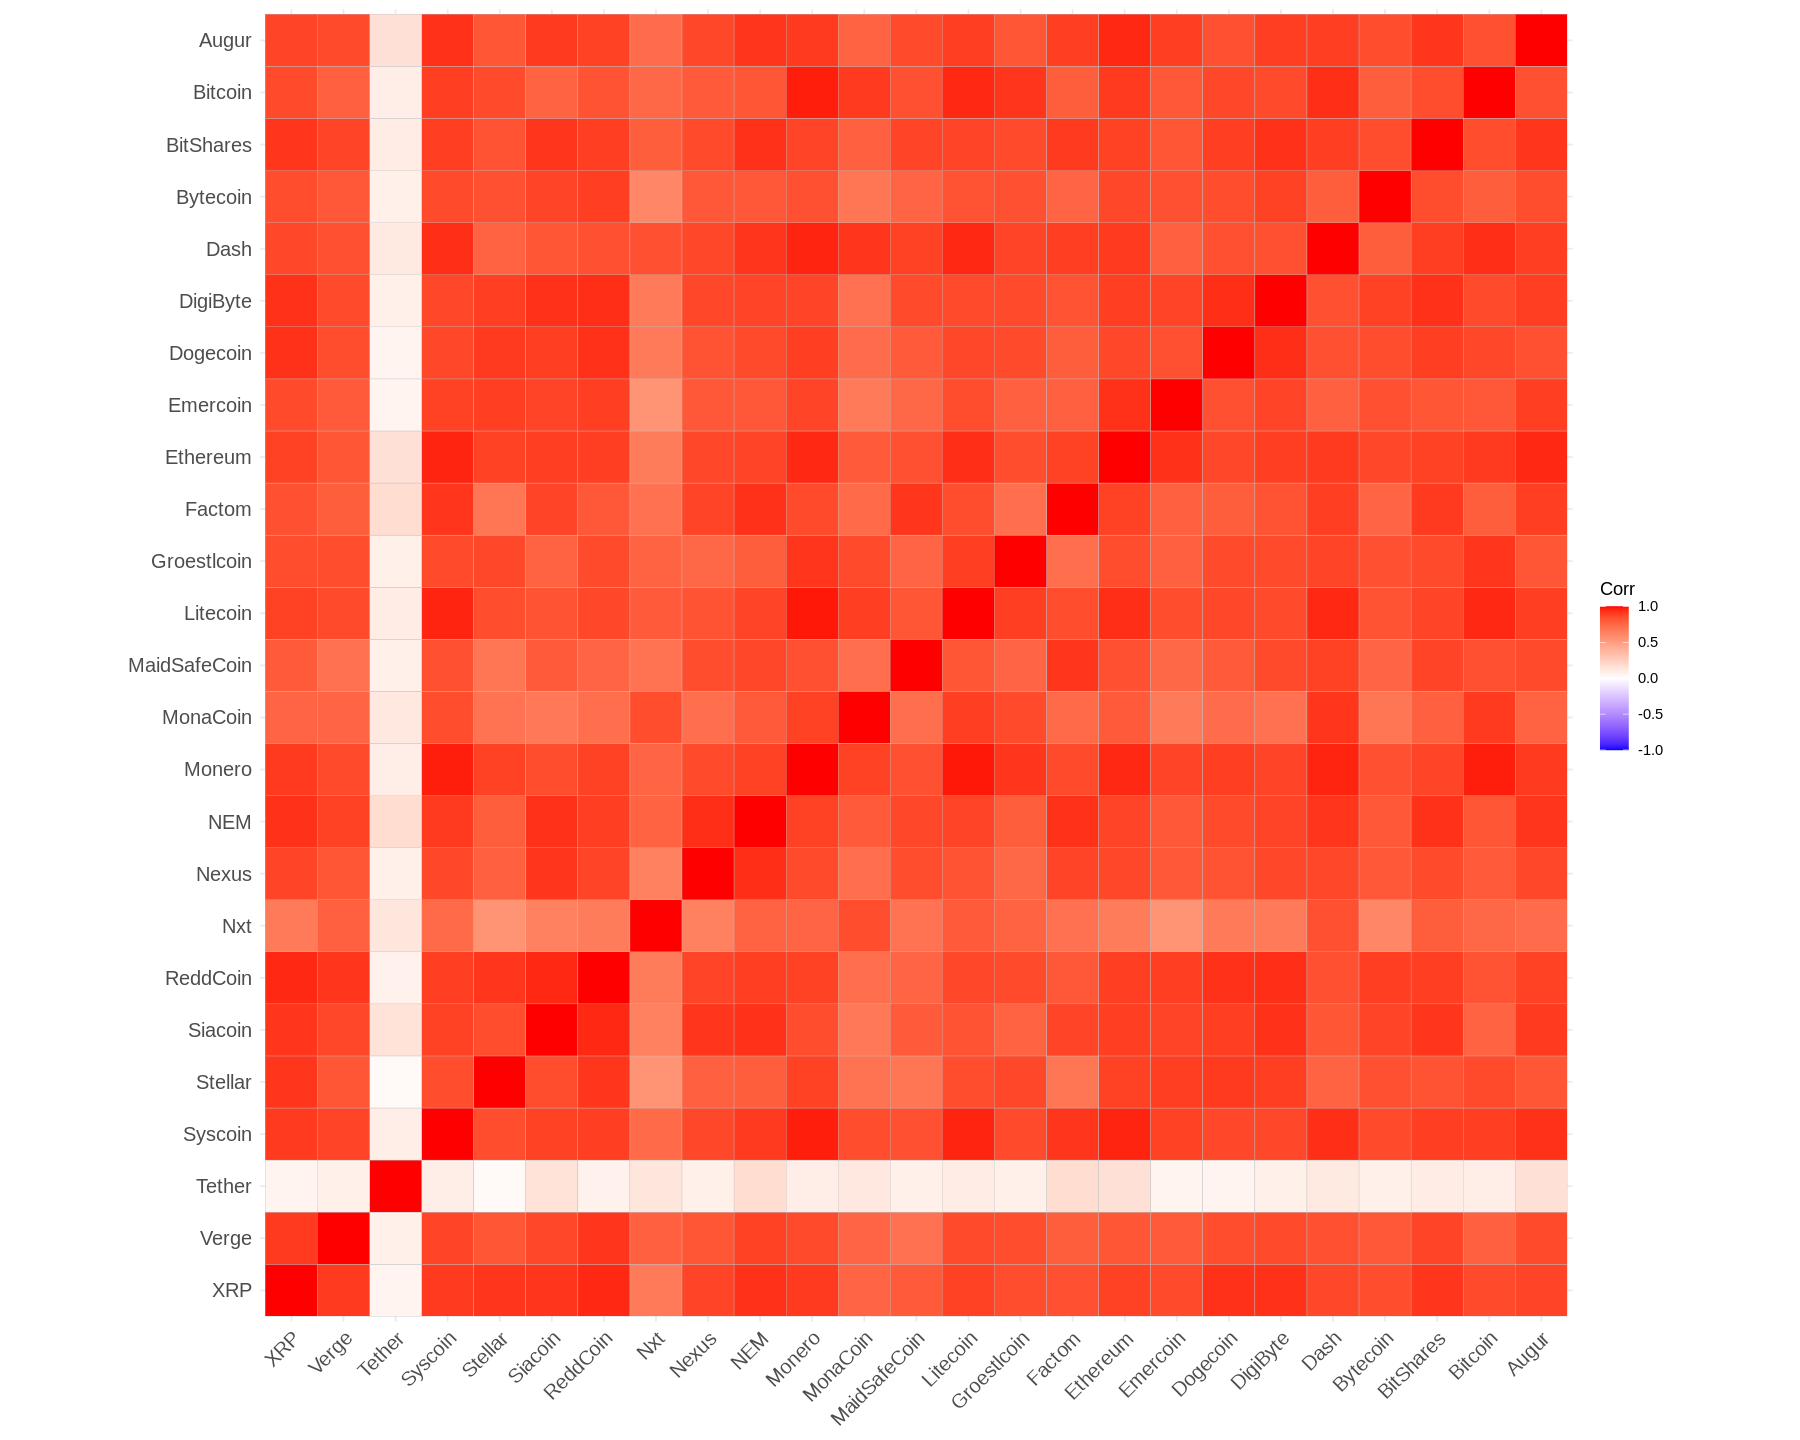

In [ ]:
df_corr <- df %>%
    group_by(name) %>%
    filter(min(date) < data_dates$max_date - years(3)) %>%
    select(date, name, close) %>% 
    inner_join(latest_market_caps %>%
                   select(name, market_latest = market)) %>%
    ungroup() %>% 
    filter(market_latest %in% sort(unique(market_latest),
                                   decreasing = TRUE)[1:25]) %>%
    select(-market_latest) %>%
    arrange(desc(name)) %>%
    pivot_wider(names_from = name, values_from = close) %>%
    select(-date) %>% 
    cor(use = "pairwise.complete.obs")

ggcorrplot(df_corr, insig = "blank")

In [ ]:
df_corr_all <- df %>%
    group_by(name) %>%
    filter(min(date) < data_dates$max_date - years(3), n() > 50) %>%
    select(date, name, close) %>% 
    inner_join(latest_market_caps %>%
                   select(name, market_latest = market)) %>%
    ungroup() %>% 
    select(-market_latest) %>%
    arrange(desc(name)) %>%
    pivot_wider(names_from = name, values_from = close) %>%
    select(-date) %>% 
    cor(use = "pairwise.complete.obs")

# Tail and head of correlations to Bitcoin
df_corr_all %>% 
    as.data.frame() %>% 
    select(Bitcoin) %>% 
    arrange(Bitcoin) %>% 
    slice(1:10, I(nrow(.) - 10):I(nrow(.) - 1))

Joining, by = "name"



,Bitcoin
,<dbl>
Xaurum,-0.4032850
NuBits,-0.3854821
LEOcoin,-0.3451912
Sprouts,-0.3304165
StrongHands,-0.3264701
CrevaCoin,-0.2929161
TEKcoin,-0.1832736
PayCoin,-0.1293479
Rimbit,-0.1196148


In [ ]:
df_corr_all %>% 
    as.data.frame() %>%
    unlist() %>%
    mean(na.rm = TRUE)

[1] 0.5578085

In [ ]:
x = filter(df, name == "Ethereum")
x = pull(x, ranknow) 
x = summary(x)
x

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3       3       3       3       3       3 

In [ ]:
install.packages("ggrepel")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggrepel)